## Imports :

In [720]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings as ws
import matplotlib.pyplot as plt
from scipy.stats import randint, expon
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

## Loading the data :

In [2]:
df = pd.read_csv('Dataset Folder/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Exploration :

In [4]:
# Number of Diabetic datapoints and Non-diabetic datapoints :-

diabetic_dataframe = df[df['Outcome']==1]

non_diabetic_dataframe = df[df['Outcome']==0]

print(f'Number of Diabetic datapoints/rows in the dataset are : {diabetic_dataframe.shape[0]}')
print(f'Number of Non-Diabetic datapoints/rows in the dataset are : {non_diabetic_dataframe.shape[0]}')

Number of Diabetic datapoints/rows in the dataset are : 268
Number of Non-Diabetic datapoints/rows in the dataset are : 500


In [5]:
# Renaming the column names for convenience, dealing with the dataframe :-

df.rename(columns={
                                     "Pregnancies": "preg", 
                                     "Glucose": "glu", 
                                     "BloodPressure":"bp", 
                                     "SkinThickness":"skinThickness",
                                     "Insulin":"insulin", 
                                     "BMI":"bmi",
                                     "DiabetesPedigreeFunction":"dpf",
                                     "Age":"age", 
                                     "Outcome":"outcome"}, inplace=True
                           )


df

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Description of the dataset :-

df.describe() 

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above description we know that, there are more than half of the columns with zero as a value in them. We'll evaluate below the number of zeroes that they have. And, also use different techniques of imputation to make the prediction performance better.

In [7]:
# Let's have a look at the null('NaN') values in the dataframe :-

for column in df.columns:
    print(f'Number of NaN(null) values in \'{column}\' column are : \
    {df[column].isnull().sum()}')

Number of NaN(null) values in 'preg' column are :     0
Number of NaN(null) values in 'glu' column are :     0
Number of NaN(null) values in 'bp' column are :     0
Number of NaN(null) values in 'skinThickness' column are :     0
Number of NaN(null) values in 'insulin' column are :     0
Number of NaN(null) values in 'bmi' column are :     0
Number of NaN(null) values in 'dpf' column are :     0
Number of NaN(null) values in 'age' column are :     0
Number of NaN(null) values in 'outcome' column are :     0


Now, we know there are no 'null' values in the entire dataframe. But, there are '0' values in the dataset and that value of '0' in columns apart from just 'preg' and 'outcome' are subject to performance change of the algorithm.(Since, that's missing information). Hence, we should find out the missing data in columns.

If, 'preg' and 'outcome' are having '0' values, then it is not missing information as there can be '0' pregnancies and non-diabetic patients which is indicated by '0'.

In [8]:
# Let's have a look at the number of  missing values in the dataframe

columns_missing_values = ['glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf']

def zeroes_in_columns(columns, dataframe):
    for missing_values_column in columns:
        print(f'Number of missing values in {missing_values_column} are : \
        {len(dataframe[dataframe[missing_values_column]==0])}')
                

zeroes_in_columns(columns_missing_values, df)

Number of missing values in glu are : 5
Number of missing values in bp are : 35
Number of missing values in skinThickness are : 227
Number of missing values in insulin are : 374
Number of missing values in bmi are : 11
Number of missing values in dpf are : 0


### Let's find out correlation between every pairs of features in the dataset :

In [9]:
corr = df.corr()
corr

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age,outcome
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glu,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


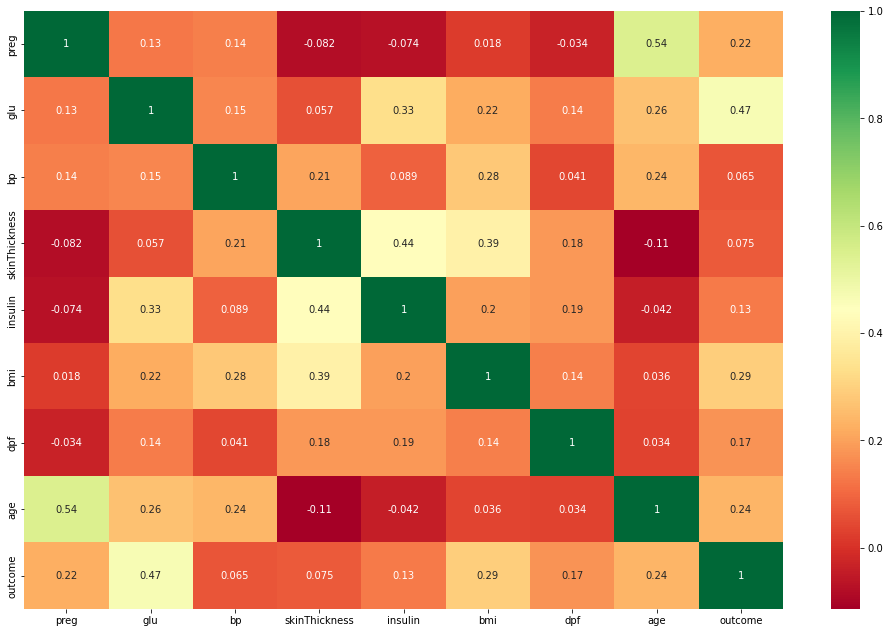

In [10]:
# Representing the above using heatmap :-

plt.figure(figsize = (17,11))

p = sns.heatmap(df.corr(), annot=True, cmap ='RdYlGn')

### Looking at the distributions of all the features :-

array([[<AxesSubplot:title={'center':'preg'}>,
        <AxesSubplot:title={'center':'glu'}>,
        <AxesSubplot:title={'center':'bp'}>],
       [<AxesSubplot:title={'center':'skinThickness'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'dpf'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'outcome'}>]], dtype=object)

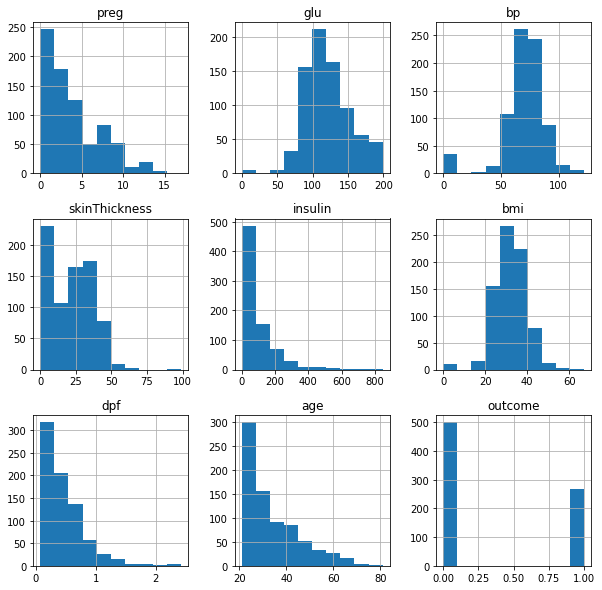

In [11]:
df.hist(figsize=(10,10))

In [12]:
ws.filterwarnings('ignore')

## Before any sort of manipulation of the missing data, let's apply the techniques and find out how well they help prediction.

In [13]:
# First of all splitting the dataset into training and testing :

X = df.iloc[:, :-1]

y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [14]:
print(f'There are {len(y_test[y_test==1])} diabetic & {len(y_test[y_test==0])} \
non-diabetic records in the test dataset.')

There are 85 diabetic & 146 non-diabetic records in the test dataset.


### We'll use the optimized hyperparameters for all the algorithms despite not manipulating the dataset in any manner. And, for that purpose, some functions defined below would become immensely useful :

Below is the function for GridSearchCV :-

In [1094]:
def grid_search_cv(estimator,param_grid,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test):
    
    '''
    This function upon rendering a list with the estimator and its parameters for hypertuning,
    along with the X_train, y_train, X_test and y_test; performs GridSearchCV for selecting best set
    of parameters, thereafter fits X_train, y_train with the suggested set of best hyperparameters
    and prints the performance metrics.
    '''        
        
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5,
                                   scoring='roc_auc')
        
    grid_search.fit(X_train, y_train)
        
    grid_search_best_estimator = grid_search.best_estimator_
        
    # Printing the best set of hyperparameters as per GridSearchCV.
    print(f'{grid_search_best_estimator} is the Best Estimator according to Exhaustive Hyperparameter search.')
        
        
    # Fitting the X_train with the best_estimator obtained and then testing X_test
    # to see how the performance is:
    grid_search_best_estimator.fit(X_train, y_train)
        
        
    y_pred = grid_search_best_estimator.predict(X_test)
        
    # Evaluating performance metrics :
    
    roc_auc_ = roc_auc_score(y_test, y_pred)*100
    
    accuracy_score_ = accuracy_score(y_test, y_pred)*100
        
    precision_score_ = precision_score(y_test, y_pred)*100
        
    recall_score_ = recall_score(y_test, y_pred)*100
        
    f1_score_ = f1_score(y_test, y_pred)*100
    
    print()
        
    # Printing the performance metrics' results:
    print(f'{accuracy_score_}% is the accuracy score for the {estimator} using the best hyparameters suggested by GridSearchCV.')
    
    print(f'{roc_auc_}% is the auroc score for the {estimator} using the best hyparameters suggested by GridSearchCV.')
        
    print(f'{precision_score_}% is the precision score for the {estimator} using the best hyparameters suggested by GridSearchCV.')
        
    print(f'{recall_score_}% is the recall score for the {estimator} using the best hyparameters suggested by GridSearchCV.')

    print(f'{f1_score_}% is the f1_score for the {estimator} using the best hyparameters suggested by GridSearchCV.')
    
    return accuracy_score_, roc_auc_

Below is the function for RandimizedSearchCV :

In [1555]:
def randomized_search_cv(estimator,param_grid,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test, n_iter=20):
    
    '''
    This function upon rendering a list with the estimator and its parameters for hypertuning,
    along with the X_train, y_train, X_test and y_test; performs RandomizearchCV for selecting best set
    of parameters, thereafter fits X_train, y_train with the suggested set of best hyperparameters
    and prints the performance metrics.
    '''        
        
    randomized_search = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, cv=5,
                                   scoring='roc_auc', n_iter=n_iter)
        
    randomized_search.fit(X_train, y_train)
        
    randomized_search_best_estimator = randomized_search.best_estimator_
        
    # Printing the best set of hyperparameters as per GridSearchCV.
    print(f'{randomized_search_best_estimator} is the Best Estimator according to Randomized Hyperparameter search.')
        
        
    # Fitting the X_train with the best_estimator obtained and then testing X_test
    # to see how the performance is:
    randomized_search_best_estimator.fit(X_train, y_train)
        
        
    y_pred = randomized_search_best_estimator.predict(X_test)
        
    # Evaluating performance metrics :
    accuracy_score_ = accuracy_score(y_test, y_pred)*100
    
    roc_auc_ = roc_auc_score(y_test, y_pred)*100
        
    precision_score_ = precision_score(y_test, y_pred)*100
        
    recall_score_ = recall_score(y_test, y_pred)*100
        
    f1_score_ = f1_score(y_test, y_pred)*100
    
    print()
        
    # Printing the performance metrics' results:
    print(f'{accuracy_score_}% is the accuracy score for {estimator} using the best hyparameters suggested by RandomizedSearchCV.')
    
    print(f'{roc_auc_}% is the auroc score for {estimator} using the best hyparameters suggested by RandomizedSearchCV.')
        
    print(f'{precision_score_}% is the precision score for {estimator} using the best hyparameters suggested by RandomizedSearchCV.')
        
    print(f'{recall_score_}% is the recall score for {estimator} using the best hyparameters suggested by RandomizedSearchCV.')

    print(f'{f1_score_}% is the f1_score for {estimator} using the best hyparameters suggested by RandomizedSearchCV.')
    
    return accuracy_score_, roc_auc_

Below is the function for Bar-Plot comparison between performance-metrics of various models :-

In [1256]:
def bar_plot_for_comaparison(y_label, performance_metric, x_label="Different ML techniques",  bar_width=0.5, \
                             figsize=(10,6), color='orange', title = "Accuracy Score comparison between best of all the Models",\
                             models = ['NaiveBayes', 'Knn', 'LogRegression', 'DecTrees', 'SVM', 'RandomForest', 'AdaBoost']):
    
    '''
    This function is to plot the comparison of performance_metric of different models.
    
    It has parameters to be passed with a certain of them having default values.
    
    Configuration of parameters :-
    
    y_label, performance_metric, x_label="Different ML techniques",  bar_width=0.5, \
    figsize=(10,6), color='orange', title = "Accuracy Score comparison between best of all the Models",\
    models = ['NaiveBayes', 'Knn', 'LogRegression', 'DecTrees', 'SVM', 'RandomForest', 'AdaBoost']
    
    performance_metric = List of the values of performance metric (i.e. either Accuracy, Auroc or else)
    '''
    models = models
    performance_metric = performance_metric
    fig = plt.figure(figsize = figsize)
    plt.bar(models, performance_metric, color =color,
            width = bar_width)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

## i.e. Before Anything :

### Naive-Bayes Classifier :-

In [1087]:
gnb_classifier = GaussianNB()

gnb_classifier.fit(X_train, y_train)

y_pred = gnb_classifier.predict(X_test)

accuracy_score_gnb = accuracy_score(y_test, y_pred)

accuracy_score_gnb*100

78.35497835497836

In [1088]:
performance_nb = accuracy_score_gnb*100
performance_nb_grid = performance_nb_randomized = 0

In [1089]:
gnb_classifier.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [1091]:
accuracy_nb_normal_1 = accuracy_score_gnb*100
auroc_nb_normal_1 = roc_auc_score(y_test, y_pred)*100

Below values will be used for plotting a bar-plot for comparison :-

In [1219]:
naiveBayesAcc1 = accuracy_nb_normal_1

naiveBayesAuroc1 = auroc_nb_normal_1

###  KNN Technique :-

In [1097]:
neigh = KNeighborsClassifier(n_neighbors=17)

neigh.fit(X_train.values, y_train.values)

y_pred = neigh.predict(X_test.values)

knn_accuracy_score = accuracy_score(y_test, y_pred)*100

print(f"{knn_accuracy_score}% is the accuracy score in percentage form with knn.")

78.78787878787878% is the accuracy score in percentage form with knn.


In [1098]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 17,
 'p': 2,
 'weights': 'uniform'}

In [1113]:
accuracy_knn_normal_1 = knn_accuracy_score

auroc_knn_normal_1 = roc_auc_score(y_test, y_pred)*100

#### Hyperparameter tuning for KNN :-

##### GridSearchCV (KNN)

In [1107]:
params_grid_dict = {
    'n_neighbors' : np.array([i for i in range(5,25,2)]),
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

neigh = KNeighborsClassifier()

accuracy_knn_grid_1, auroc_knn_grid_1 = grid_search_cv(neigh,params_grid_dict,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test)

KNeighborsClassifier(n_neighbors=23, weights='distance') is the Best Estimator according to Exhaustive Hyperparameter search.

76.62337662337663% is the accuracy score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
70.93875906526993% is the auroc score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
79.24528301886792% is the precision score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
49.411764705882355% is the recall score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
60.86956521739131% is the f1_score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (KNN) :-

In [1108]:
neigh = KNeighborsClassifier()

params_grid_dict = {
    # Increasing the range of n_neighbors to maybe find a better set of hyperparameters.
    'n_neighbors' : np.array([i for i in range(5,40,2)]), 
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

accuracy_knn_random_1, auroc_knn_random_1 = randomized_search_cv(neigh,params_grid_dict,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test)

KNeighborsClassifier(metric='euclidean', n_neighbors=37) is the Best Estimator according to Randomized Hyperparameter search.

76.62337662337663% is the accuracy score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
70.20145044319096% is the auroc score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
82.97872340425532% is the precision score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
45.88235294117647% is the recall score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
59.09090909090908% is the f1_score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below are the values for Accuracy and Auroc score for KNN, to be used for Bar plot for comparison :-

In [1220]:
knnAccuracy1 = max(accuracy_knn_normal_1, accuracy_knn_grid_1, accuracy_knn_random_1)

knnAuroc1 = max(auroc_knn_normal_1, auroc_knn_grid_1, auroc_knn_random_1)

### Logistic Regression :-

In [1126]:
logistic_regression = LogisticRegression(max_iter=200)

logistic_regression.fit(X_train, y_train)

# Predicting the X_test datapoints :
y_pred = logistic_regression.predict(X_test)

accuracy_lr_normal_1 = accuracy_score(y_test, y_pred)*100

auroc_lr_normal_1 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_lr_normal_1}% is the accuracy score in percentage form with LogisticRegression.")

78.35497835497836% is the accuracy score in percentage form with LogisticRegression.


In [395]:
logistic_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter tuning for LogisticRegression :-

##### GridSearchCV (LogisticRegression)

In [1200]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [100, 1000,2500, 5000],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

accuracy_lr_grid_1, auroc_lr_grid_1 = grid_search_cv(logistic_regression, params_grid_dict, 
               X_train=X_train,
               y_train = y_train,
               X_test = X_test,
               y_test = y_test)     

LogisticRegression(C=0.012742749857031334) is the Best Estimator according to Exhaustive Hyperparameter search.

78.35497835497836% is the accuracy score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
74.0290088638195% is the auroc score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
77.77777777777779% is the precision score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
57.647058823529406% is the recall score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
66.21621621621621% is the f1_score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (LogisticRegression)

In [1129]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [40,50,70,80,100,1000,2500,5000, ],
    'C' : np.logspace(-5, 5, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

accuracy_lr_random_1, auroc_lr_random_1 = randomized_search_cv(logistic_regression,params_grid_dict,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test)

LogisticRegression(C=69.51927961775606, solver='newton-cg') is the Best Estimator according to Randomized Hyperparameter search.

78.35497835497836% is the accuracy score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
74.0290088638195% is the auroc score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
77.77777777777779% is the precision score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
57.647058823529406% is the recall score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
66.21621621621621% is the f1_score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1221]:
logisticRegressionAcc1 = max(accuracy_lr_normal_1, accuracy_lr_grid_1, accuracy_lr_random_1)

logisticRegressionAuroc1 = max(auroc_lr_normal_1, auroc_lr_grid_1, auroc_lr_random_1)

### Decision Trees :-

In [1137]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy_dt_normal_1 = accuracy_score(y_test, y_pred)*100

auroc_dt_normal_1 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_dt_normal_1}% is the accuracy score in percentage form with DecisionTreesTechnique.")

70.995670995671% is the accuracy score in percentage form with DecisionTreesTechnique.


In [399]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

### Hyperparameter tunning for DecisionTreeClassifier :-

#### GridSearchCV (DecisionTreesClassifier)

In [1138]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,20)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_dt_grid_1, auroc_dt_grid_1  = grid_search_cv(decision_tree, params_grid_dict, 
               X_train=X_train,
               y_train = y_train,
               X_test = X_test,
               y_test = y_test)  

DecisionTreeClassifier(criterion='entropy', max_depth=9,
                       min_impurity_decrease=0.01, min_samples_split=50) is the Best Estimator according to Exhaustive Hyperparameter search.

77.92207792207793% is the accuracy score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
74.6696212731668% is the auroc score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
73.61111111111111% is the precision score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
62.35294117647059% is the recall score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
67.51592356687898% is the f1_score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (DecisionTrees):-

In [1184]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,40)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 1.05, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_dt_random_1, auroc_dt_random_1 = randomized_search_cv(decision_tree,params_grid_dict,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=15,
                       min_impurity_decrease=0.01, min_samples_split=50) is the Best Estimator according to Randomized Hyperparameter search.

77.92207792207793% is the accuracy score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
74.6696212731668% is the auroc score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
73.61111111111111% is the precision score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
62.35294117647059% is the recall score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
67.51592356687898% is the f1_score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1222]:
decisionTreeAcc1 = max(accuracy_dt_normal_1, accuracy_dt_grid_1, accuracy_dt_random_1)

decisionTreeAuroc1 = max(auroc_dt_normal_1, auroc_dt_grid_1, auroc_dt_random_1)

### Support Vector Machine :-

In [1190]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predicting the X_test :
y_pred = svc_model.predict(X_test)

accuracy_svm_normal_1 = accuracy_score(y_test, y_pred)*100

auroc_svm_normal_1 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_svm_normal_1}% is the accuracy score in percentage form with SVM technique.")

77.05627705627705% is the accuracy score in percentage form with SVM technique.


In [408]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Hyperparameter tuning of the above model of SVM :-

#### GridSearchCV (SVM) :-

In [1191]:
svc_model = SVC()

param_grid_dict = {
    'C':[0.1, 1, 10, 100],
   'kernel' : ['rbf', 'poly','sigmoid']
}

accuracy_svm_grid_1, auroc_svm_grid_1 = grid_search_cv(svc_model, param_grid_dict, 
               X_train=X_train,
               y_train = y_train,
               X_test = X_test,
               y_test = y_test)

SVC(C=10, kernel='poly') is the Best Estimator according to Exhaustive Hyperparameter search.

79.22077922077922% is the accuracy score for the SVC() using the best hyparameters suggested by GridSearchCV.
73.73086220789685% is the auroc score for the SVC() using the best hyparameters suggested by GridSearchCV.
84.90566037735849% is the precision score for the SVC() using the best hyparameters suggested by GridSearchCV.
52.94117647058824% is the recall score for the SVC() using the best hyparameters suggested by GridSearchCV.
65.21739130434784% is the f1_score for the SVC() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (SVM) :-

In [1192]:
svc_model = SVC()

param_grid_dict = {
    'C':[0.1, 1, 10, 100, 1000],
    'kernel' : ['rbf', 'poly','sigmoid', 'linear'],
    }

accuracy_svm_random_1, auroc_svm_random_1  = randomized_search_cv(svc_model,param_grid_dict,X_train=X_train, 
                   y_train=y_train, X_test=X_test, y_test=y_test)

SVC(C=1, kernel='linear') is the Best Estimator according to Randomized Hyperparameter search.

79.22077922077922% is the accuracy score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
74.9597099113618% is the auroc score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
79.36507936507937% is the precision score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
58.82352941176471% is the recall score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
67.56756756756756% is the f1_score for SVC() using the best hyparameters suggested by RandomizedSearchCV.


In [1223]:
svmAcc1 = max(accuracy_svm_normal_1, accuracy_svm_grid_1, accuracy_svm_random_1)

svmAuroc1 = max(auroc_svm_normal_1, auroc_svm_grid_1, auroc_svm_random_1)

### RandomForestClassifier :-

In [1196]:
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy_rf_normal_1 = accuracy_score(y_test, y_pred)*100

auroc_rf_normal_1 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_rf_normal_1}% is the accuracy score in percentage form with RandomForestClassifier technique.")

81.38528138528139% is the accuracy score in percentage form with RandomForestClassifier technique.


In [1676]:
auroc_rf_normal_1

78.14665592264302

In [412]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter tuning for the above model of "RandomForestClassifier" :-

#### GridSearchCV  (RandomForestClassifier):-

In [1199]:
random_forest = RandomForestClassifier()

param_grid_dict = {
    'max_depth':[2,3,4,5,6,7],
    'n_estimators':[10, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100],
}

accuracy_rf_grid_1, auroc_rf_grid_1 = grid_search_cv(random_forest, param_grid_dict, 
               X_train=X_train,
               y_train = y_train,
               X_test = X_test,
               y_test = y_test)

RandomForestClassifier(max_depth=5, n_estimators=50) is the Best Estimator according to Exhaustive Hyperparameter search.

79.22077922077922% is the accuracy score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
75.20547945205482% is the auroc score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
78.46153846153847% is the precision score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
60.0% is the recall score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
68.0% is the f1_score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.


##### RandomizedSearchCV (RandomForestClassifier) :-

In [1204]:
random_forest = RandomForestClassifier()

params_grid_dict = {
    'max_depth':np.arange(1,40),
    'n_estimators':np.arange(30,250,20),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_rf_random_1, auroc_rf_random_1 = randomized_search_cv(random_forest, params_grid_dict, X_train=X_train,
                    y_train=y_train, X_test=X_test, y_test=y_test)

RandomForestClassifier(max_depth=26, min_impurity_decrease=0.01,
                       min_samples_split=40, n_estimators=50) is the Best Estimator according to Randomized Hyperparameter search.

77.92207792207793% is the accuracy score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
72.45769540692989% is the auroc score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
81.48148148148148% is the precision score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
51.76470588235295% is the recall score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
63.309352517985616% is the f1_score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1224]:
randomForestAcc1 = max(accuracy_rf_normal_1, accuracy_rf_grid_1, accuracy_rf_random_1)

randomForestAuroc1 = max(auroc_rf_normal_1, auroc_rf_grid_1, auroc_rf_random_1)

### Adaboost Classifier :-

In [1211]:
adaboost_classifier = AdaBoostClassifier(random_state=42)

adaboost_classifier.fit(X_train.values, y_train.values)

y_pred = adaboost_classifier.predict(X_test.values)

accuracy_ab_normal_1 = accuracy_score(y_test, y_pred)*100

auroc_ab_normal_1 = roc_auc_score(y_test, y_pred)*100

print(f'{accuracy_ab_normal_1}% is the accuracy score using AdaboostClassifier.')

78.35497835497836% is the accuracy score using AdaboostClassifier.


In [419]:
adaboost_classifier.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

### Hyperparameter Tuning for Adaboost Classifier :-

#### GridSearchCV (AdaBoost Classifier) :-

In [1212]:
adaboost_classifier = AdaBoostClassifier()

param_grid_dict = {
    'n_estimators':np.arange(50,100,10),
    'learning_rate':np.arange(1.0,10.0,1.0)
}

accuracy_ab_grid_1, auroc_ab_grid_1 = grid_search_cv(adaboost_classifier, param_grid_dict, 
               X_train=X_train,
               y_train = y_train,
               X_test = X_test,
               y_test = y_test)

AdaBoostClassifier(n_estimators=90) is the Best Estimator according to Exhaustive Hyperparameter search.

80.08658008658008% is the accuracy score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
77.11925866236905% is the auroc score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
76.71232876712328% is the precision score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
65.88235294117646% is the recall score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
70.88607594936708% is the f1_score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (AdaBoost Classifier) :-

In [1217]:
adaboost_classifier = AdaBoostClassifier()

param_grid_dict = {
    'n_estimators':np.arange(50,110,10),
    'learning_rate':np.arange(1,20,1)
}

accuracy_ab_random_1, auroc_ab_random_1 = randomized_search_cv(adaboost_classifier, param_grid_dict, X_train,
                    y_train=y_train, X_test=X_test, y_test=y_test)

AdaBoostClassifier(learning_rate=1, n_estimators=90) is the Best Estimator according to Randomized Hyperparameter search.

80.08658008658008% is the accuracy score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
77.11925866236905% is the auroc score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
76.71232876712328% is the precision score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
65.88235294117646% is the recall score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
70.88607594936708% is the f1_score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1225]:
adaBoostAcc1 = max(accuracy_ab_normal_1, accuracy_ab_grid_1, accuracy_ab_random_1)

adaBoostAuroc1 = max(auroc_ab_normal_1, auroc_ab_grid_1, auroc_ab_random_1)

#### Accuracy Bar Plot :-

In [1272]:
accuracies1 = naiveBayesAcc1, knnAccuracy1, logisticRegressionAcc1, decisionTreeAcc1, svmAcc1, randomForestAcc1, adaBoostAcc1

In [1673]:
accuracies1

(78.35497835497836,
 78.78787878787878,
 78.35497835497836,
 77.92207792207793,
 79.22077922077922,
 81.38528138528139,
 80.08658008658008)

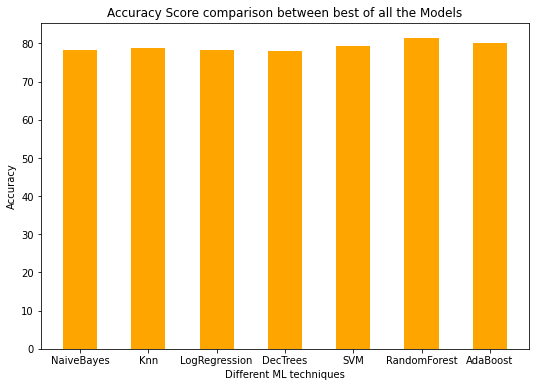

In [1286]:
bar_plot_for_comaparison(y_label='Accuracy', performance_metric = accuracies, x_label="Different ML techniques",  bar_width=0.5, \
                             figsize=(8.75,6), color='orange', title = "Accuracy Score comparison between best of all the Models",\
                     models = ['NaiveBayes', 'Knn', 'LogRegression', 'DecTrees', 'SVM', 'RandomForest', 'AdaBoost'])

RandomForestClassifier has the highest Accuracy of 81.39 %.

In [1288]:
sorted(accuracies)

[77.92207792207793,
 78.35497835497836,
 78.35497835497836,
 78.78787878787878,
 79.22077922077922,
 80.08658008658008,
 81.38528138528139]

#### Auroc Bar Plot :-

In [1672]:
aurocScores = naiveBayesAuroc1, knnAuroc1, logisticRegressionAuroc1, decisionTreeAuroc1, svmAuroc1, randomForestAuroc1, \
              adaBoostAuroc1

aurocScores

(75.01208702659146,
 73.87993553585818,
 74.0290088638195,
 74.6696212731668,
 74.9597099113618,
 78.14665592264302,
 77.11925866236905)

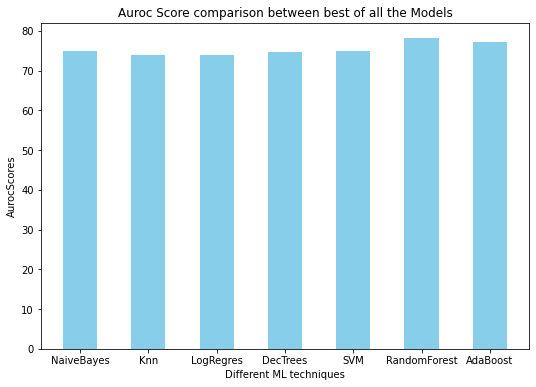

In [1671]:
bar_plot_for_comaparison(y_label='AurocScores', performance_metric = aurocScores, x_label="Different ML techniques",  bar_width=0.5, \
                             figsize=(8.75,6), color='skyblue', title = "Auroc Score comparison between best of all the Models",\
                     models = ['NaiveBayes', 'Knn', 'LogRegres', 'DecTrees', 'SVM', 'RandomForest', 'AdaBoost'])

RandomForestClassifier has the highest AUROC score of 78.15 %.

In [1289]:
sorted(aurocScores)

[73.87993553585818,
 74.0290088638195,
 74.6696212731668,
 74.9597099113618,
 75.01208702659146,
 77.11925866236905,
 78.14665592264302]

In [1290]:
#list_of_performance = [
#    [performance_nb,performance_knn,performance_lr,performance_dt, performance_svm, performance_rf,performance_ab,],
#    [performance_nb_grid, performance_knn_grid, performance_lr_grid, performance_dt_grid,  performance_svm_grid,\
#     performance_rf_grid, performance_ab_grid],
#   [performance_nb_randomized, performance_knn_randomized, performance_lr_randomized, performance_dt_randomized, \
#    performance_svm_randomized, performance_rf_randomized, performance_ab_randomized]
#]

In [1291]:
#X = np.arange(7)
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#ax.bar(X + 0.00, list_of_performance[0], color = 'b', width = 0.25)
#ax.bar(X + 0.25, list_of_performance[1], color = 'g', width = 0.25)
#ax.bar(X + 0.50, list_of_performance[2], color = 'r', width = 0.25)

## Mean Imputation & Feature Scaling :-

In [422]:
imp = SimpleImputer(missing_values=0, strategy='mean')

In [423]:
X_train

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [424]:
X_test

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
241,4,91,70,32,88,33.1,0.446,22
599,1,109,38,18,120,23.1,0.407,26
650,1,91,54,25,100,25.2,0.234,23
11,10,168,74,0,0,38.0,0.537,34


In [425]:
X_train_ = X_train.drop(columns=['preg'])

X_train_

,glu,bp,skinThickness,insulin,bmi,dpf,age
88,136,70,32,110,37.1,0.153,43
467,97,64,36,100,36.8,0.600,25
550,116,70,28,0,27.4,0.204,21
147,106,64,35,119,30.5,1.400,34
481,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...
645,157,74,35,440,39.4,0.134,30
715,187,50,33,392,33.9,0.826,34
72,126,90,0,0,43.4,0.583,42
235,171,72,0,0,43.6,0.479,26





The reason behind droping 'preg' below is so that, it does not get transformed where it has zero values. As, pregnancy can be zero in any case.

In [426]:
X_test_ = X_test.drop(columns=['preg'])

X_test_

,glu,bp,skinThickness,insulin,bmi,dpf,age
285,136,74,26,135,26.0,0.647,51
101,151,60,0,0,26.1,0.179,22
581,109,60,27,0,25.0,0.206,27
352,61,82,28,0,34.4,0.243,46
726,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...
241,91,70,32,88,33.1,0.446,22
599,109,38,18,120,23.1,0.407,26
650,91,54,25,100,25.2,0.234,23
11,168,74,0,0,38.0,0.537,34


In [427]:
imp.fit(X_train_)

SimpleImputer(missing_values=0)

In [428]:
X_train_imputed = imp.transform(X_train_)

X_test_imputed = imp.transform(X_test_)

In [429]:
X_train_imputed

array([[1.36000000e+02, 7.00000000e+01, 3.20000000e+01, ...,
        3.71000000e+01, 1.53000000e-01, 4.30000000e+01],
       [9.70000000e+01, 6.40000000e+01, 3.60000000e+01, ...,
        3.68000000e+01, 6.00000000e-01, 2.50000000e+01],
       [1.16000000e+02, 7.00000000e+01, 2.80000000e+01, ...,
        2.74000000e+01, 2.04000000e-01, 2.10000000e+01],
       ...,
       [1.26000000e+02, 9.00000000e+01, 2.86721311e+01, ...,
        4.34000000e+01, 5.83000000e-01, 4.20000000e+01],
       [1.71000000e+02, 7.20000000e+01, 2.86721311e+01, ...,
        4.36000000e+01, 4.79000000e-01, 2.60000000e+01],
       [1.02000000e+02, 7.60000000e+01, 3.70000000e+01, ...,
        3.29000000e+01, 6.65000000e-01, 4.60000000e+01]])

In [430]:
X_test_imputed

array([[136.        ,  74.        ,  26.        , ...,  26.        ,
          0.647     ,  51.        ],
       [151.        ,  60.        ,  28.67213115, ...,  26.1       ,
          0.179     ,  22.        ],
       [109.        ,  60.        ,  27.        , ...,  25.        ,
          0.206     ,  27.        ],
       ...,
       [ 91.        ,  54.        ,  25.        , ...,  25.2       ,
          0.234     ,  23.        ],
       [168.        ,  74.        ,  28.67213115, ...,  38.        ,
          0.537     ,  34.        ],
       [112.        ,  82.        ,  32.        , ...,  34.2       ,
          0.26      ,  36.        ]])

In [431]:
X_train_imputed = pd.DataFrame(X_train_imputed)
X_test_imputed = pd.DataFrame(X_test_imputed)

In [432]:
X_train_imputed

,0,1,2,3,4,5,6
0,136.0,70.0,32.000000,110.000000,37.1,0.153,43.0
1,97.0,64.0,36.000000,100.000000,36.8,0.600,25.0
2,116.0,70.0,28.000000,158.243346,27.4,0.204,21.0
3,106.0,64.0,35.000000,119.000000,30.5,1.400,34.0
4,123.0,88.0,37.000000,158.243346,35.2,0.197,29.0
...,...,...,...,...,...,...,...
532,157.0,74.0,35.000000,440.000000,39.4,0.134,30.0
533,187.0,50.0,33.000000,392.000000,33.9,0.826,34.0
534,126.0,90.0,28.672131,158.243346,43.4,0.583,42.0
535,171.0,72.0,28.672131,158.243346,43.6,0.479,26.0


In [433]:
X_test_imputed

,0,1,2,3,4,5,6
0,136.0,74.0,26.000000,135.000000,26.0,0.647,51.0
1,151.0,60.0,28.672131,158.243346,26.1,0.179,22.0
2,109.0,60.0,27.000000,158.243346,25.0,0.206,27.0
3,61.0,82.0,28.000000,158.243346,34.4,0.243,46.0
4,116.0,78.0,29.000000,180.000000,36.1,0.496,25.0
...,...,...,...,...,...,...,...
226,91.0,70.0,32.000000,88.000000,33.1,0.446,22.0
227,109.0,38.0,18.000000,120.000000,23.1,0.407,26.0
228,91.0,54.0,25.000000,100.000000,25.2,0.234,23.0
229,168.0,74.0,28.672131,158.243346,38.0,0.537,34.0


Renaming the column names from [0,1,2,3,4,5,6] to the original names in X_train_imputed and X_test_imputed :-

In [434]:
X_train_imputed.columns = X_test_imputed.columns = \
[ 'glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf', 'age']

The number of missing values (i.e. zeroes) now in the X_train_imputed and X_test_imputed :-

In [435]:
# Using the function defined above in the notebook to find out the zeroes in columns of any given dataframe :

columns_zero_verification = ['glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf', 'age']

# X_train_imputed results :
zeroes_in_columns(columns_zero_verification, X_train_imputed)

Number of missing values in glu are : 0
Number of missing values in bp are : 0
Number of missing values in skinThickness are : 0
Number of missing values in insulin are : 0
Number of missing values in bmi are : 0
Number of missing values in dpf are : 0
Number of missing values in age are : 0


In [436]:
# X_test_imputed results :
zeroes_in_columns(columns_zero_verification, X_test_imputed)

Number of missing values in glu are : 0
Number of missing values in bp are : 0
Number of missing values in skinThickness are : 0
Number of missing values in insulin are : 0
Number of missing values in bmi are : 0
Number of missing values in dpf are : 0
Number of missing values in age are : 0


Getting the 'preg' column in 'X_train_imputed' and 'X_test_imputed':-

In [437]:
preg = np.array(X_train['preg'])

X_train_imputed.insert(0, "preg", preg, True)

X_train_imputed

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
0,15,136.0,70.0,32.000000,110.000000,37.1,0.153,43.0
1,0,97.0,64.0,36.000000,100.000000,36.8,0.600,25.0
2,1,116.0,70.0,28.000000,158.243346,27.4,0.204,21.0
3,2,106.0,64.0,35.000000,119.000000,30.5,1.400,34.0
4,0,123.0,88.0,37.000000,158.243346,35.2,0.197,29.0
...,...,...,...,...,...,...,...,...
532,2,157.0,74.0,35.000000,440.000000,39.4,0.134,30.0
533,7,187.0,50.0,33.000000,392.000000,33.9,0.826,34.0
534,13,126.0,90.0,28.672131,158.243346,43.4,0.583,42.0
535,4,171.0,72.0,28.672131,158.243346,43.6,0.479,26.0


In [438]:
preg = np.array(X_test['preg'])

X_test_imputed.insert(0, "preg", preg, True)

X_test_imputed

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
0,7,136.0,74.0,26.000000,135.000000,26.0,0.647,51.0
1,1,151.0,60.0,28.672131,158.243346,26.1,0.179,22.0
2,6,109.0,60.0,27.000000,158.243346,25.0,0.206,27.0
3,3,61.0,82.0,28.000000,158.243346,34.4,0.243,46.0
4,1,116.0,78.0,29.000000,180.000000,36.1,0.496,25.0
...,...,...,...,...,...,...,...,...
226,4,91.0,70.0,32.000000,88.000000,33.1,0.446,22.0
227,1,109.0,38.0,18.000000,120.000000,23.1,0.407,26.0
228,1,91.0,54.0,25.000000,100.000000,25.2,0.234,23.0
229,10,168.0,74.0,28.672131,158.243346,38.0,0.537,34.0


Now, we also want to get a hint of how much the distribution of the columns have changed where we've applied mean imputation. Intuitively it seems, that there would have been significant narrowing towards the mean in distributions. :-

### Feature Scaling :-

In [439]:
norm = MinMaxScaler()

In [440]:
norm.fit(X_train_imputed)

MinMaxScaler()

In [441]:
X_train_scaled = norm.transform(X_train_imputed)

X_train_scaled = pd.DataFrame(X_train_scaled)

X_train_scaled

,0,1,2,3,4,5,6,7
0,1.000000,0.597403,0.469388,0.271739,0.130316,0.386503,0.030303,0.431373
1,0.000000,0.344156,0.408163,0.315217,0.116598,0.380368,0.229501,0.078431
2,0.066667,0.467532,0.469388,0.228261,0.196493,0.188139,0.053030,0.000000
3,0.133333,0.402597,0.408163,0.304348,0.142661,0.251534,0.586007,0.254902
4,0.000000,0.512987,0.653061,0.326087,0.196493,0.347648,0.049911,0.156863
...,...,...,...,...,...,...,...,...
532,0.133333,0.733766,0.510204,0.304348,0.582990,0.433538,0.021836,0.176471
533,0.466667,0.928571,0.265306,0.282609,0.517147,0.321063,0.330214,0.254902
534,0.866667,0.532468,0.673469,0.235567,0.196493,0.515337,0.221925,0.411765
535,0.266667,0.824675,0.489796,0.235567,0.196493,0.519427,0.175579,0.098039


In [442]:
X_test_scaled = norm.transform(X_test_imputed)

X_test_scaled = pd.DataFrame(X_test_scaled)

X_test_scaled

,0,1,2,3,4,5,6,7
0,0.466667,0.597403,0.510204,0.206522,0.164609,0.159509,0.250446,0.588235
1,0.066667,0.694805,0.367347,0.235567,0.196493,0.161554,0.041889,0.019608
2,0.400000,0.422078,0.367347,0.217391,0.196493,0.139059,0.053922,0.117647
3,0.200000,0.110390,0.591837,0.228261,0.196493,0.331288,0.070410,0.490196
4,0.066667,0.467532,0.551020,0.239130,0.226337,0.366053,0.183155,0.078431
...,...,...,...,...,...,...,...,...
226,0.266667,0.305195,0.469388,0.271739,0.100137,0.304703,0.160873,0.019608
227,0.066667,0.422078,0.142857,0.119565,0.144033,0.100204,0.143494,0.098039
228,0.066667,0.305195,0.306122,0.195652,0.116598,0.143149,0.066399,0.039216
229,0.666667,0.805195,0.510204,0.235567,0.196493,0.404908,0.201426,0.254902


In [443]:
X_train_scaled.columns = X_test_scaled.columns = \
[ 'preg','glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf', 'age']

### Mean Imputation and Feature Scaling have been performed on the data. Now, the time is to notice the performance of algorithms after having done this :-

### Naive Bayes Classifier :

In [1292]:
gnb_classifier = GaussianNB()

gnb_classifier.fit(X_train_scaled, y_train) # Have used X_train_imputed

y_pred = gnb_classifier.predict(X_test_scaled)

accuracy_score_gnb = accuracy_score(y_test, y_pred)

accuracy_score_gnb*100

78.35497835497836

In [1293]:
accuracy_nb_normal_2 = accuracy_score_gnb*100
auroc_nb_normal_2 = roc_auc_score(y_test, y_pred)*100

In [1294]:
naiveBayesAcc2 = accuracy_nb_normal_2

naiveBayesAuroc2 = auroc_nb_normal_2

### KNN Technique :-

In [1298]:
neigh = KNeighborsClassifier(n_neighbors=17)

neigh.fit(X_train_scaled.values, y_train.values)

y_pred = neigh.predict(X_test_scaled.values)

knn_accuracy_score = accuracy_score(y_test, y_pred)*100

print(f"{knn_accuracy_score}% is the accuracy score in percentage form with knn.")

81.38528138528139% is the accuracy score in percentage form with knn.


In [1299]:
accuracy_knn_normal_2 = knn_accuracy_score

auroc_knn_normal_2 = roc_auc_score(y_test, y_pred)*100

####  GridSearchCV (KNN) :-

In [1300]:
params_grid_dict = {
    'n_neighbors' : np.array([i for i in range(5,25,2)]),
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

neigh = KNeighborsClassifier()

accuracy_knn_grid_2, auroc_knn_grid_2 = grid_search_cv(neigh,params_grid_dict,X_train=X_train_scaled, 
                   y_train=y_train, X_test=X_test_scaled, y_test=y_test)

KNeighborsClassifier(n_neighbors=23, weights='distance') is the Best Estimator according to Exhaustive Hyperparameter search.

83.11688311688312% is the accuracy score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
79.51651893634165% is the auroc score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
84.84848484848484% is the precision score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
65.88235294117646% is the recall score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
74.17218543046357% is the f1_score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (KNN)

In [1303]:
neigh = KNeighborsClassifier()

params_grid_dict = {
    # Increasing the range of n_neighbors to maybe find a better set of hyperparameters.
    'n_neighbors' : np.array([i for i in range(5,40,2)]), 
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

accuracy_knn_random_2, auroc_knn_random_2 = randomized_search_cv(neigh,params_grid_dict,X_train=X_train_scaled, 
                   y_train=y_train, X_test=X_test_scaled, y_test=y_test)

KNeighborsClassifier(metric='euclidean', n_neighbors=27, weights='distance') is the Best Estimator according to Randomized Hyperparameter search.

80.95238095238095% is the accuracy score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
77.0668815471394% is the auroc score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
81.53846153846153% is the precision score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
62.35294117647059% is the recall score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
70.66666666666667% is the f1_score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.


In [1305]:
knnAccuracy2 = max(accuracy_knn_normal_2, accuracy_knn_grid_2, accuracy_knn_random_2)

knnAuroc2 = max(auroc_knn_normal_2, auroc_knn_grid_2, auroc_knn_random_2)

### Logistic Regression :-

In [1311]:
logistic_regression = LogisticRegression(max_iter=200)

logistic_regression.fit(X_train_scaled, y_train)

# Predicting the X_test datapoints :
y_pred = logistic_regression.predict(X_test_scaled)

logistic_accuracy_score = accuracy_score(y_test, y_pred)*100

print(f"{logistic_accuracy_score}% is the accuracy score in percentage form with LogisticRegression.")

77.92207792207793% is the accuracy score in percentage form with LogisticRegression.


In [1312]:
accuracy_lr_normal_2 = accuracy_score(y_test, y_pred)*100

auroc_lr_normal_2 = roc_auc_score(y_test, y_pred)*100

#### GridSearchCV (LogisticRegression) :-

In [1315]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [100, 1000,2500, 5000],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

accuracy_lr_grid_2, auroc_lr_grid_2 = grid_search_cv(logistic_regression, params_grid_dict, 
               X_train=X_train_scaled,
               y_train = y_train,
               X_test = X_test_scaled,
               y_test = y_test)     

LogisticRegression(C=1.623776739188721, solver='liblinear') is the Best Estimator according to Exhaustive Hyperparameter search.

77.48917748917748% is the accuracy score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
73.0983078162772% is the auroc score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
76.19047619047619% is the precision score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
56.470588235294116% is the recall score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
64.86486486486486% is the f1_score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (LogisticRegression) :-

In [1325]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [50,70,80,100,1000,2500,5000, ],
    'C' : np.logspace(-5, 5, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

accuracy_lr_random_2, auroc_lr_random_2 = randomized_search_cv(logistic_regression,params_grid_dict,X_train=X_train_scaled, 
                   y_train=y_train, X_test=X_test_scaled, y_test=y_test)


LogisticRegression(C=69.51927961775606, max_iter=80, penalty='l1',
                   solver='saga') is the Best Estimator according to Randomized Hyperparameter search.

78.35497835497836% is the accuracy score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
74.2747784045125% is the auroc score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
76.92307692307693% is the precision score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
58.82352941176471% is the recall score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
66.66666666666667% is the f1_score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.


In [1326]:
logisticRegressionAcc2 = max(accuracy_lr_normal_2, accuracy_lr_grid_2, accuracy_lr_random_2)

logisticRegressionAuroc2 = max(auroc_lr_normal_2, auroc_lr_grid_2, auroc_lr_random_2)

## Decision Tree Classifier :-

In [1328]:
# Note :- Using the imputed and not scaled data for DecisionTrees:

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train_imputed, y_train)

y_pred = decision_tree.predict(X_test_imputed)

accuracy_score_dt = accuracy_score(y_test, y_pred)*100

print(f"{accuracy_score_dt}% is the accuracy score in percentage form with DecisionTreesTechnique.")

72.72727272727273% is the accuracy score in percentage form with DecisionTreesTechnique.


In [1329]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [1331]:
accuracy_dt_normal_2 = accuracy_score(y_test, y_pred)*100

auroc_dt_normal_2 = roc_auc_score(y_test, y_pred)*100

#### GridSearchCV (DecisionTrees) :-

In [1333]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,20)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_dt_grid_2, auroc_dt_grid_2 = grid_search_cv(decision_tree, params_grid_dict, 
               X_train=X_train_imputed,
               y_train = y_train,
               X_test = X_test_imputed,
               y_test = y_test)  

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.01, min_samples_split=90) is the Best Estimator according to Exhaustive Hyperparameter search.

79.22077922077922% is the accuracy score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
76.18855761482675% is the auroc score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
75.34246575342466% is the precision score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
64.70588235294117% is the recall score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
69.62025316455697% is the f1_score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (DecisionTrees) :-

In [1349]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,30)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 1.05, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_dt_random_2, auroc_dt_random_2 = randomized_search_cv(decision_tree,params_grid_dict,X_train=X_train_imputed, 
                   y_train=y_train, X_test=X_test_imputed, y_test=y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=15,
                       min_impurity_decrease=0.01, min_samples_split=90) is the Best Estimator according to Randomized Hyperparameter search.

79.22077922077922% is the accuracy score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
76.18855761482675% is the auroc score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
75.34246575342466% is the precision score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
64.70588235294117% is the recall score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
69.62025316455697% is the f1_score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1352]:
decisionTreeAcc2 = max(accuracy_dt_normal_2, accuracy_dt_grid_2, accuracy_dt_random_2)

decisionTreeAuroc2 = max(auroc_dt_normal_2, auroc_dt_grid_2, auroc_dt_random_2)

### Support Vector Machine :-

In [1358]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

# Predicting the X_test :
y_pred = svc_model.predict(X_test_scaled)

accuracy_svm_normal_2 = accuracy_score(y_test, y_pred)*100

auroc_svm_normal_2 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_svm_normal_2}% is the accuracy score in percentage form with SVM technique.")

81.81818181818183% is the accuracy score in percentage form with SVM technique.


In [472]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### GridSearchCV (SVM):-

In [1359]:
svc_model = SVC()

param_grid_dict = {
    'C':[0.1, 1, 10, 100],
   'kernel' : ['rbf', 'poly','sigmoid']
}

accuracy_svm_grid_2, auroc_svm_grid_2 = grid_search_cv(svc_model, param_grid_dict, 
               X_train=X_train_scaled,
               y_train = y_train,
               X_test = X_test_scaled,
               y_test = y_test)

SVC(C=0.1, kernel='poly') is the Best Estimator according to Exhaustive Hyperparameter search.

80.08658008658008% is the accuracy score for the SVC() using the best hyparameters suggested by GridSearchCV.
74.90733279613215% is the auroc score for the SVC() using the best hyparameters suggested by GridSearchCV.
85.45454545454545% is the precision score for the SVC() using the best hyparameters suggested by GridSearchCV.
55.294117647058826% is the recall score for the SVC() using the best hyparameters suggested by GridSearchCV.
67.14285714285715% is the f1_score for the SVC() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (SVM) :-

In [1360]:
svc_model = SVC()

param_grid_dict = {
    'C':[0.1, 1, 10, 100, 1000],
    'kernel' : ['rbf', 'poly','sigmoid', 'linear'],
    }

accuracy_svm_random_2, auroc_svm_random_2  = randomized_search_cv(svc_model,param_grid_dict,X_train=X_train_scaled, 
                   y_train=y_train, X_test=X_test_scaled, y_test=y_test)

SVC(C=1, kernel='linear') is the Best Estimator according to Randomized Hyperparameter search.

77.92207792207793% is the accuracy score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
72.94923448831587% is the auroc score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
79.3103448275862% is the precision score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
54.11764705882353% is the recall score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
64.33566433566433% is the f1_score for SVC() using the best hyparameters suggested by RandomizedSearchCV.


In [1406]:
svmAcc2 = max(accuracy_svm_normal_2, accuracy_svm_grid_2, accuracy_svm_random_2)

svmAuroc2 = max(auroc_svm_normal_2, auroc_svm_grid_2, auroc_svm_random_2)

### RandomForestClassifier :-

Note :- Underneath since the DecisionTrees work, we've used Imputed data and not scaled.

In [1364]:
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train_imputed, y_train)

y_pred = random_forest.predict(X_test_imputed)

accuracy_rf_normal_2 = accuracy_score(y_test, y_pred)*100

auroc_rf_normal_2 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_rf_normal_2}% is the accuracy score in percentage form with RandomForestClassifier technique.")

77.48917748917748% is the accuracy score in percentage form with RandomForestClassifier technique.


In [477]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### GridSearchCV (RandomForestClassifier) :-

In [1366]:
random_forest = RandomForestClassifier()

param_grid_dict = {
    'max_depth':[2,3,4,5,6,7],
    'n_estimators':[10, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100],
}

accuracy_rf_grid_2, auroc_rf_grid_2 = grid_search_cv(random_forest, param_grid_dict, 
               X_train=X_train_imputed,
               y_train = y_train,
               X_test = X_test_imputed,
               y_test = y_test)

RandomForestClassifier(max_depth=4, n_estimators=50) is the Best Estimator according to Exhaustive Hyperparameter search.

79.22077922077922% is the accuracy score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
74.46817082997582% is the auroc score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
81.35593220338984% is the precision score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
56.470588235294116% is the recall score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
66.66666666666666% is the f1_score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.


### RandomizedSearchCV (RandomForestClassifier) :-

In [1376]:
random_forest = RandomForestClassifier()

params_grid_dict = {
    'max_depth':np.arange(1,40),
    'n_estimators':np.arange(30,151,20),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_rf_random_2, auroc_rf_random_2 = randomized_search_cv(random_forest, params_grid_dict, X_train=X_train_imputed,
                    y_train=y_train, X_test=X_test_imputed, y_test=y_test)

RandomForestClassifier(max_depth=16, min_impurity_decrease=0.01,
                       min_samples_split=60, n_estimators=110) is the Best Estimator according to Randomized Hyperparameter search.

77.92207792207793% is the accuracy score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
72.94923448831587% is the auroc score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
79.3103448275862% is the precision score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
54.11764705882353% is the recall score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
64.33566433566433% is the f1_score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1377]:
randomForestAcc2 = max(accuracy_rf_normal_2, accuracy_rf_grid_2, accuracy_rf_random_2)

randomForestAuroc2 = max(auroc_rf_normal_2, auroc_rf_grid_2, auroc_rf_random_2)

###  Adaboost Classifier :-

In [1388]:
adaboost_classifier = AdaBoostClassifier(random_state=42)

adaboost_classifier.fit(X_train_imputed.values, y_train.values)

y_pred = adaboost_classifier.predict(X_test_imputed.values)

accuracy_ab_normal_2 = accuracy_score(y_test, y_pred)*100

auroc_ab_normal_2 = roc_auc_score(y_test, y_pred)*100

print(f'{accuracy_ab_normal_2}% is the accuracy score using AdaboostClassifier.')

77.92207792207793% is the accuracy score using AdaboostClassifier.


In [502]:
adaboost_classifier.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

#### GridSearchCV (Adaboost Classifier) :-

In [1389]:
adaboost_classifier = AdaBoostClassifier()

param_grid_dict = {
    'n_estimators':np.arange(50,100,10),
    'learning_rate':np.arange(1.0,10.0,1.0)
}

accuracy_ab_grid_2, auroc_ab_grid_2 = grid_search_cv(adaboost_classifier, param_grid_dict, 
               X_train=X_train_imputed,
               y_train = y_train,
               X_test = X_test_imputed,
               y_test = y_test)

AdaBoostClassifier(n_estimators=60) is the Best Estimator according to Exhaustive Hyperparameter search.

77.05627705627705% is the accuracy score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
73.00161160354553% is the auroc score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
74.24242424242425% is the precision score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
57.647058823529406% is the recall score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
64.90066225165563% is the f1_score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (Adaboost Classifier) :-

In [1402]:
adaboost_classifier = AdaBoostClassifier()

param_grid_dict = {
    'n_estimators':np.arange(50,110,10),
    'learning_rate':np.arange(1,20,1)
}

accuracy_ab_random_2, auroc_ab_random_2 = randomized_search_cv(adaboost_classifier, param_grid_dict, X_train_imputed,
                    y_train=y_train, X_test=X_test_imputed, y_test=y_test)

AdaBoostClassifier(learning_rate=1, n_estimators=90) is the Best Estimator according to Randomized Hyperparameter search.

79.65367965367966% is the accuracy score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
77.02256244963739% is the auroc score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
75.0% is the precision score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
67.05882352941175% is the recall score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
70.80745341614907% is the f1_score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1403]:
adaBoostAcc2 = max(accuracy_ab_normal_2, accuracy_ab_grid_2, accuracy_ab_random_2)

adaBoostAuroc2 = max(auroc_ab_normal_2, auroc_ab_grid_2, auroc_ab_random_2)

### Accuracy Bar Plot :-

In [1674]:
accuracies2 = naiveBayesAcc2, knnAccuracy2, logisticRegressionAcc2, decisionTreeAcc2, svmAcc2, randomForestAcc2, adaBoostAcc2

accuracies2

(78.35497835497836,
 83.11688311688312,
 78.35497835497836,
 79.22077922077922,
 81.81818181818183,
 79.22077922077922,
 79.65367965367966)

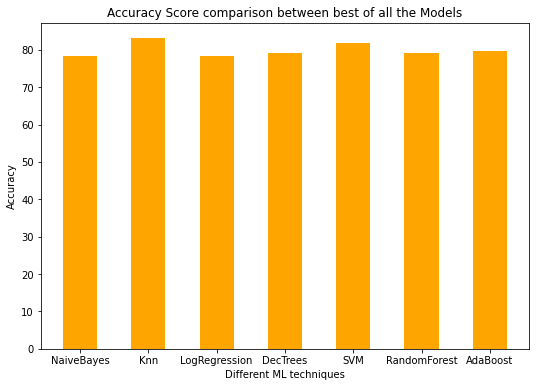

In [1408]:
bar_plot_for_comaparison(y_label='Accuracy', performance_metric = accuracies2, x_label="Different ML techniques",  bar_width=0.5, \
                             figsize=(8.75,6), color='orange', title = "Accuracy Score comparison between best of all the Models",\
                     models = ['NaiveBayes', 'Knn', 'LogRegression', 'DecTrees', 'SVM', 'RandomForest', 'AdaBoost'])

In [1409]:
sorted(accuracies2)        

[78.35497835497836,
 78.35497835497836,
 79.22077922077922,
 79.22077922077922,
 79.65367965367966,
 81.81818181818183,
 83.11688311688312]

### Auroc Bar Plot :-

In [1675]:
aurocScores2 = naiveBayesAuroc2, knnAuroc2, logisticRegressionAuroc2, decisionTreeAuroc2, svmAuroc2, randomForestAuroc2, \
              adaBoostAuroc2

aurocScores2

(75.50362610797742,
 79.51651893634165,
 74.2747784045125,
 76.18855761482675,
 77.26027397260275,
 74.46817082997582,
 77.02256244963739)

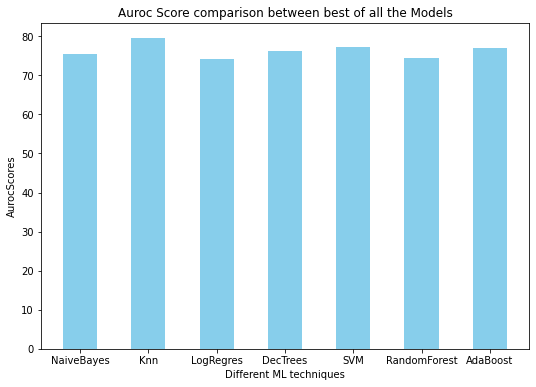

In [1412]:
bar_plot_for_comaparison(y_label='AurocScores', performance_metric = aurocScores2, x_label="Different ML techniques",  bar_width=0.5, \
                             figsize=(8.75,6), color='skyblue', title = "Auroc Score comparison between best of all the Models",\
                     models = ['NaiveBayes', 'Knn', 'LogRegres', 'DecTrees', 'SVM', 'RandomForest', 'AdaBoost'])

In [1413]:
sorted(aurocScores2)

[74.2747784045125,
 74.46817082997582,
 75.50362610797742,
 76.18855761482675,
 77.02256244963739,
 77.26027397260275,
 79.51651893634165]

### Multivariate Imputation (KNN Imputation) :-

After performing Univariate Imputation (i.e. Mean Imputation), time to perform Multivariate Imputation (i.e. KNN Imputation) & there after scaling the features. We'll use Imputed data for a few Algorithms, especially the DecisionTrees. And, scaled data for KNN and LogisticRegression type of Algorithms.

In [554]:
knn_imp = KNNImputer(missing_values=0, n_neighbors=5, weights='uniform')

In [555]:
knn_imp.fit(X_train_)

KNNImputer(missing_values=0)

In [556]:
X_train_knnimp = knn_imp.transform(X_train_)

In [557]:
X_test_knnimp = knn_imp.transform(X_test_)

In [558]:
X_train_knnimp

array([[1.36e+02, 7.00e+01, 3.20e+01, ..., 3.71e+01, 1.53e-01, 4.30e+01],
       [9.70e+01, 6.40e+01, 3.60e+01, ..., 3.68e+01, 6.00e-01, 2.50e+01],
       [1.16e+02, 7.00e+01, 2.80e+01, ..., 2.74e+01, 2.04e-01, 2.10e+01],
       ...,
       [1.26e+02, 9.00e+01, 3.36e+01, ..., 4.34e+01, 5.83e-01, 4.20e+01],
       [1.71e+02, 7.20e+01, 4.10e+01, ..., 4.36e+01, 4.79e-01, 2.60e+01],
       [1.02e+02, 7.60e+01, 3.70e+01, ..., 3.29e+01, 6.65e-01, 4.60e+01]])

In [559]:
X_test_knnimp

array([[136.   ,  74.   ,  26.   , ...,  26.   ,   0.647,  51.   ],
       [151.   ,  60.   ,  26.   , ...,  26.1  ,   0.179,  22.   ],
       [109.   ,  60.   ,  27.   , ...,  25.   ,   0.206,  27.   ],
       ...,
       [ 91.   ,  54.   ,  25.   , ...,  25.2  ,   0.234,  23.   ],
       [168.   ,  74.   ,  27.8  , ...,  38.   ,   0.537,  34.   ],
       [112.   ,  82.   ,  32.   , ...,  34.2  ,   0.26 ,  36.   ]])

In [560]:
X_train_knnimp = pd.DataFrame(X_train_knnimp)
X_test_knnimp = pd.DataFrame(X_test_knnimp)

In [561]:
X_train_knnimp

,0,1,2,3,4,5,6
0,136.0,70.0,32.0,110.0,37.1,0.153,43.0
1,97.0,64.0,36.0,100.0,36.8,0.600,25.0
2,116.0,70.0,28.0,99.4,27.4,0.204,21.0
3,106.0,64.0,35.0,119.0,30.5,1.400,34.0
4,123.0,88.0,37.0,182.8,35.2,0.197,29.0
...,...,...,...,...,...,...,...
532,157.0,74.0,35.0,440.0,39.4,0.134,30.0
533,187.0,50.0,33.0,392.0,33.9,0.826,34.0
534,126.0,90.0,33.6,141.6,43.4,0.583,42.0
535,171.0,72.0,41.0,331.4,43.6,0.479,26.0


In [562]:
X_test_knnimp

,0,1,2,3,4,5,6
0,136.0,74.0,26.0,135.0,26.0,0.647,51.0
1,151.0,60.0,26.0,247.4,26.1,0.179,22.0
2,109.0,60.0,27.0,91.2,25.0,0.206,27.0
3,61.0,82.0,28.0,53.0,34.4,0.243,46.0
4,116.0,78.0,29.0,180.0,36.1,0.496,25.0
...,...,...,...,...,...,...,...
226,91.0,70.0,32.0,88.0,33.1,0.446,22.0
227,109.0,38.0,18.0,120.0,23.1,0.407,26.0
228,91.0,54.0,25.0,100.0,25.2,0.234,23.0
229,168.0,74.0,27.8,232.4,38.0,0.537,34.0


##### Time to change the names of columns in X_train_knnimp and X_test_knnimp & also add the 'preg' column in both the dataframes :

In [563]:
X_train_knnimp.columns = X_test_knnimp.columns = \
[ 'glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf', 'age']

In [564]:
preg = np.array(X_train['preg'])

X_train_knnimp.insert(0, "preg", preg, True)

X_train_knnimp

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
0,15,136.0,70.0,32.0,110.0,37.1,0.153,43.0
1,0,97.0,64.0,36.0,100.0,36.8,0.600,25.0
2,1,116.0,70.0,28.0,99.4,27.4,0.204,21.0
3,2,106.0,64.0,35.0,119.0,30.5,1.400,34.0
4,0,123.0,88.0,37.0,182.8,35.2,0.197,29.0
...,...,...,...,...,...,...,...,...
532,2,157.0,74.0,35.0,440.0,39.4,0.134,30.0
533,7,187.0,50.0,33.0,392.0,33.9,0.826,34.0
534,13,126.0,90.0,33.6,141.6,43.4,0.583,42.0
535,4,171.0,72.0,41.0,331.4,43.6,0.479,26.0


In [565]:
preg = np.array(X_test['preg'])

X_test_knnimp.insert(0, "preg", preg, True)

X_test_knnimp

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
0,7,136.0,74.0,26.0,135.0,26.0,0.647,51.0
1,1,151.0,60.0,26.0,247.4,26.1,0.179,22.0
2,6,109.0,60.0,27.0,91.2,25.0,0.206,27.0
3,3,61.0,82.0,28.0,53.0,34.4,0.243,46.0
4,1,116.0,78.0,29.0,180.0,36.1,0.496,25.0
...,...,...,...,...,...,...,...,...
226,4,91.0,70.0,32.0,88.0,33.1,0.446,22.0
227,1,109.0,38.0,18.0,120.0,23.1,0.407,26.0
228,1,91.0,54.0,25.0,100.0,25.2,0.234,23.0
229,10,168.0,74.0,27.8,232.4,38.0,0.537,34.0


Feature Scaling after KNNImputation in the data :-

In [566]:
norm1 = MinMaxScaler()

In [567]:
norm1.fit(X_train_knnimp)

MinMaxScaler()

In [568]:
X_train_knnscaled = norm1.transform(X_train_knnimp)

X_test_knnscaled = norm1.transform(X_test_knnimp)

Converting the Numpy array objects into Dataframes :-

In [ ]:
X_train_knnscaled = pd.DataFrame(X_train_knnscaled)
X_test_knnscaled = pd.DataFrame(X_test_knnscaled)

Renaming the columns of Dataframe to the actual names rather than number from 0 to 7 :-

In [ ]:
X_train_knnscaled.columns = X_test_knnscaled.columns = \
[ 'preg','glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf', 'age']

Now, since we have X_train_knnimp, X_test_knnimp and X_train_knnscaled, X_test_knnscaled; we can go ahead with applying various algorithmic techniques as previously. 

### Naive Bayes Classifier :-

In [1430]:
gnb_classifier = GaussianNB()

gnb_classifier.fit(X_train_knnscaled, y_train) # Have used X_train_imputed

y_pred = gnb_classifier.predict(X_test_knnscaled)

accuracy_nb_normal_3 = accuracy_score(y_test, y_pred)*100

auroc_nb_normal_3 = roc_auc_score(y_test, y_pred)*100

print(f'{accuracy_nb_normal_3}% is the accuracy score for the NaiveBayes Classifier')

77.92207792207793% is the accuracy score for the NaiveBayes Classifier


Below values will be used for plotting a bar-plot for comparison :-

In [1435]:
naiveBayesAcc3 = accuracy_nb_normal_3

naiveBayesAuroc3 = auroc_nb_normal_3

### KNN Technique :-

In [1795]:
neigh = KNeighborsClassifier()

neigh.fit(X_train_knnscaled.values, y_train.values)

y_pred = neigh.predict(X_test_knnscaled.values)

accuracy_knn_normal_3 = accuracy_score(y_test, y_pred)*100

auroc_knn_normal_3 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_knn_normal_3}% is the accuracy score in percentage form with knn.")

80.95238095238095% is the accuracy score in percentage form with knn.


In [1796]:
auroc_knn_normal_3

78.04995970991135

In [1797]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### GridSearchCV (KNN) :- 

In [1443]:
params_grid_dict = {
    'n_neighbors' : np.array([i for i in range(5,25,2)]),
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

neigh = KNeighborsClassifier()

accuracy_knn_grid_3, auroc_knn_grid_3 = grid_search_cv(neigh,params_grid_dict,X_train=X_train_knnscaled, 
                   y_train=y_train, X_test=X_test_knnscaled, y_test=y_test)

KNeighborsClassifier(n_neighbors=23, weights='distance') is the Best Estimator according to Exhaustive Hyperparameter search.

80.95238095238095% is the accuracy score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
76.82111200644643% is the auroc score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
82.53968253968253% is the precision score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
61.1764705882353% is the recall score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
70.27027027027026% is the f1_score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (KNN):-

In [1772]:
neigh = KNeighborsClassifier()

params_grid_dict = {
    # Increasing the range of n_neighbors to maybe find a better set of hyperparameters.
    'n_neighbors' : np.array([i for i in range(5,56,2)]), 
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

accuracy_knn_random_3, auroc_knn_random_3 = randomized_search_cv(neigh,params_grid_dict,X_train=X_train_knnscaled, 
                   y_train=y_train, X_test=X_test_knnscaled, y_test=y_test)

KNeighborsClassifier(n_neighbors=53, weights='distance') is the Best Estimator according to Randomized Hyperparameter search.

79.65367965367966% is the accuracy score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
74.56486704270749% is the auroc score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
83.92857142857143% is the precision score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
55.294117647058826% is the recall score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
66.66666666666667% is the f1_score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below are the values for Accuracy and Auroc score for KNN, to be used for Bar plot for comparison :-

In [1798]:
knnAccuracy3 = max(accuracy_knn_normal_3, accuracy_knn_grid_3, accuracy_knn_random_3)

knnAuroc3 = max(auroc_knn_normal_3, auroc_knn_grid_3, auroc_knn_random_3)

#### LogisticRegression :-

In [1452]:
logistic_regression = LogisticRegression(max_iter=200)

logistic_regression.fit(X_train_knnscaled, y_train)

# Predicting the X_test datapoints :
y_pred = logistic_regression.predict(X_test_knnscaled)

accuracy_lr_normal_3 = accuracy_score(y_test, y_pred)*100

auroc_lr_normal_3 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_lr_normal_3}% is the accuracy score in percentage form with LogisticRegression.")

78.35497835497836% is the accuracy score in percentage form with LogisticRegression.


#### GridSearchCV (LogisticRegression) :-

In [1453]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [100, 1000,2500, 5000],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

accuracy_lr_grid_3, auroc_lr_grid_3 = grid_search_cv(logistic_regression, params_grid_dict, 
               X_train=X_train_knnscaled,
               y_train = y_train,
               X_test = X_test_knnscaled,
               y_test = y_test) 

LogisticRegression(C=29.763514416313132, solver='liblinear') is the Best Estimator according to Exhaustive Hyperparameter search.

77.92207792207793% is the accuracy score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
73.68654311039484% is the auroc score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
76.5625% is the precision score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
57.647058823529406% is the recall score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
65.77181208053692% is the f1_score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (LogisticRegression) :-

In [1455]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [50,70,80,100,1000,2500,5000, ],
    'C' : np.logspace(-5, 5, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

accuracy_lr_random_3, auroc_lr_random_3 = randomized_search_cv(logistic_regression,params_grid_dict,X_train=X_train_knnscaled, 
                   y_train=y_train, X_test=X_test_knnscaled, y_test=y_test)

LogisticRegression(C=1.8329807108324339, max_iter=5000, solver='newton-cg') is the Best Estimator according to Randomized Hyperparameter search.

78.35497835497836% is the accuracy score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
74.0290088638195% is the auroc score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
77.77777777777779% is the precision score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
57.647058823529406% is the recall score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
66.21621621621621% is the f1_score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1456]:
logisticRegressionAcc3 = max(accuracy_lr_normal_3, accuracy_lr_grid_3, accuracy_lr_random_3)

logisticRegressionAuroc3 = max(auroc_lr_normal_3, auroc_lr_grid_3, auroc_lr_random_3)

#### DecisionTreeClassifier :-

In [1459]:
# Note :- Using the imputed and not scaled data for DecisionTrees:

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train_knnimp, y_train)

y_pred = decision_tree.predict(X_test_knnimp)

accuracy_dt_normal_3 = accuracy_score(y_test, y_pred)*100

auroc_dt_normal_3 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_dt_normal_3}% is the accuracy score in percentage form with DecisionTreesTechnique.")


70.995670995671% is the accuracy score in percentage form with DecisionTreesTechnique.


#### GridSearchCV (DecisionTrees) :-

In [1460]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,20)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_dt_grid_3, auroc_dt_grid_3  = grid_search_cv(decision_tree, params_grid_dict, 
               X_train=X_train_knnimp,
               y_train = y_train,
               X_test = X_test_knnimp,
               y_test = y_test)  

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.01, min_samples_split=50) is the Best Estimator according to Exhaustive Hyperparameter search.

77.05627705627705% is the accuracy score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
76.93392425463335% is the auroc score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
66.3265306122449% is the precision score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
76.47058823529412% is the recall score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
71.03825136612022% is the f1_score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (DecisionTrees) :-

In [1475]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,30)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 1.05, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_dt_random_3, auroc_dt_random_3 = randomized_search_cv(decision_tree,params_grid_dict,X_train=X_train_knnimp, 
                   y_train=y_train, X_test=X_test_knnimp, y_test=y_test)


DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01,
                       min_samples_split=50) is the Best Estimator according to Randomized Hyperparameter search.

78.78787878787878% is the accuracy score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
77.32070910556004% is the auroc score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
70.93023255813954% is the precision score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
71.76470588235294% is the recall score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
71.34502923976608% is the f1_score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1500]:
DecisionTreeAcc3 = max(accuracy_dt_normal_3, accuracy_dt_grid_3, accuracy_dt_random_3)

DecisionTreeAuroc3 = max(auroc_dt_normal_3, auroc_dt_grid_3, auroc_dt_random_3)

### Support Vector Machine :-

In [1477]:
svc_model = SVC()
svc_model.fit(X_train_knnscaled, y_train)

# Predicting the X_test :
y_pred = svc_model.predict(X_test_knnscaled)

accuracy_svm_normal_3 = accuracy_score(y_test, y_pred)*100

auroc_svm_normal_3 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_svm_normal_3}% is the accuracy score in percentage form with SVM technique.")

80.51948051948052% is the accuracy score in percentage form with SVM technique.


In [1817]:
auroc_svm_normal_3

75.98710717163578

#### GridSearchCV (SVM):-

In [1478]:
svc_model = SVC()

param_grid_dict = {
    'C':[0.1, 1, 10, 100],
   'kernel' : ['rbf', 'poly','sigmoid']
}

accuracy_svm_grid_3, auroc_svm_grid_3 = grid_search_cv(svc_model, param_grid_dict, 
               X_train=X_train_knnscaled,
               y_train = y_train,
               X_test = X_test_knnscaled,
               y_test = y_test)

SVC(C=0.1, kernel='poly') is the Best Estimator according to Exhaustive Hyperparameter search.

80.08658008658008% is the accuracy score for the SVC() using the best hyparameters suggested by GridSearchCV.
75.15310233682514% is the auroc score for the SVC() using the best hyparameters suggested by GridSearchCV.
84.21052631578947% is the precision score for the SVC() using the best hyparameters suggested by GridSearchCV.
56.470588235294116% is the recall score for the SVC() using the best hyparameters suggested by GridSearchCV.
67.6056338028169% is the f1_score for the SVC() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (SVM) :-

In [1479]:
svc_model = SVC()

param_grid_dict = {
    'C':[0.1, 1, 10, 100, 1000],
    'kernel' : ['rbf', 'poly','sigmoid', 'linear'],
    }

accuracy_svm_random_3, auroc_svm_random_3  = randomized_search_cv(svc_model,param_grid_dict,X_train=X_train_knnscaled, 
                   y_train=y_train, X_test=X_test_knnscaled, y_test=y_test)

SVC(C=1, kernel='linear') is the Best Estimator according to Randomized Hyperparameter search.

79.22077922077922% is the accuracy score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
74.71394037066881% is the auroc score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
80.32786885245902% is the precision score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
57.647058823529406% is the recall score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
67.12328767123287% is the f1_score for SVC() using the best hyparameters suggested by RandomizedSearchCV.


In [1480]:
SvmAcc3 = max(accuracy_svm_normal_3, accuracy_svm_grid_3, accuracy_svm_random_3)

SvmAuroc3 = max(auroc_svm_normal_3, auroc_svm_grid_3, auroc_svm_random_3)

### RandomForestClassifier :-

In [1481]:
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train_knnimp, y_train)

y_pred = random_forest.predict(X_test_knnimp)

accuracy_rf_normal_3 = accuracy_score(y_test, y_pred)*100

auroc_rf_normal_3 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_rf_normal_3}% is the accuracy score in percentage form with RandomForestClassifier technique.")

79.65367965367966% is the accuracy score in percentage form with RandomForestClassifier technique.


#### GridSearchCV (RandomForestClassifier) :-

In [1482]:
random_forest = RandomForestClassifier()

param_grid_dict = {
    'max_depth':[2,3,4,5,6,7],
    'n_estimators':[10, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100],
}

accuracy_rf_grid_3, auroc_rf_grid_3 = grid_search_cv(random_forest, param_grid_dict, 
               X_train=X_train_knnimp,
               y_train = y_train,
               X_test = X_test_knnimp,
               y_test = y_test)

RandomForestClassifier(max_depth=6, n_estimators=70) is the Best Estimator according to Exhaustive Hyperparameter search.

78.35497835497836% is the accuracy score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
74.76631748589847% is the auroc score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
75.36231884057972% is the precision score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
61.1764705882353% is the recall score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
67.53246753246755% is the f1_score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (RandomForestClassifier) :-

In [1490]:
random_forest = RandomForestClassifier()

params_grid_dict = {
    'max_depth':np.arange(1,40),
    'n_estimators':np.arange(30,151,20),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_rf_random_3, auroc_rf_random_3 = randomized_search_cv(random_forest, params_grid_dict, X_train=X_train_knnimp,
                    y_train=y_train, X_test=X_test_knnimp, y_test=y_test)

RandomForestClassifier(max_depth=39, min_impurity_decrease=0.01,
                       min_samples_split=90, n_estimators=90) is the Best Estimator according to Randomized Hyperparameter search.

77.92207792207793% is the accuracy score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
72.70346494762288% is the auroc score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
80.35714285714286% is the precision score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
52.94117647058824% is the recall score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
63.829787234042556% is the f1_score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1491]:
RandomForestAcc3 = max(accuracy_rf_normal_3, accuracy_rf_grid_3, accuracy_rf_random_3)

RandomForestAuroc3 = max(auroc_rf_normal_3, auroc_rf_grid_3, auroc_rf_random_3)

### Adaboost Classifier :-

In [1492]:
adaboost_classifier = AdaBoostClassifier(random_state=42)

adaboost_classifier.fit(X_train_knnimp.values, y_train.values)

y_pred = adaboost_classifier.predict(X_test_knnimp.values)

accuracy_ab_normal_3 = accuracy_score(y_test, y_pred)*100

auroc_ab_normal_3 = roc_auc_score(y_test, y_pred)*100

print(f'{accuracy_ab_normal_3}% is the accuracy score using AdaboostClassifier.')

79.65367965367966% is the accuracy score using AdaboostClassifier.


#### GridSearchCV (Adaboost Classifier) :-

In [1679]:
adaboost_classifier = AdaBoostClassifier()

param_grid_dict = {
    'n_estimators':np.arange(50,100,10),
    'learning_rate':np.arange(1.0,10.0,1.0)
}

accuracy_ab_grid_3, auroc_ab_grid_3 = grid_search_cv(adaboost_classifier, param_grid_dict, 
               X_train=X_train_knnimp,
               y_train = y_train,
               X_test = X_test_knnimp,
               y_test = y_test)

AdaBoostClassifier() is the Best Estimator according to Exhaustive Hyperparameter search.

79.65367965367966% is the accuracy score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
77.26833199033038% is the auroc score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
74.35897435897436% is the precision score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
68.23529411764706% is the recall score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
71.16564417177914% is the f1_score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (Adaboost Classifier) :-

In [1813]:
adaboost_classifier = AdaBoostClassifier()

param_grid_dict = {
    'n_estimators':np.arange(50,110,10),
    'learning_rate':np.arange(1,20,1)
}

accuracy_ab_random_3, auroc_ab_random_3 = randomized_search_cv(adaboost_classifier, param_grid_dict, X_train_knnimp,
                    y_train=y_train, X_test=X_test_knnimp, y_test=y_test)

AdaBoostClassifier(learning_rate=1, n_estimators=90) is the Best Estimator according to Randomized Hyperparameter search.

80.51948051948052% is the accuracy score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
77.46172441579371% is the auroc score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
77.77777777777779% is the precision score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
65.88235294117646% is the recall score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
71.3375796178344% is the f1_score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1814]:
AdaBoostAcc3 = max(accuracy_ab_normal_3, accuracy_ab_grid_3, accuracy_ab_random_3)

AdaBoostAuroc3 = max(auroc_ab_normal_3, auroc_ab_grid_3, auroc_ab_random_3)

### Accuracy Bar Plot :-

In [1821]:
accuracies3 = naiveBayesAcc3, knnAccuracy3, logisticRegressionAcc3, DecisionTreeAcc3, SvmAcc3, RandomForestAcc3, AdaBoostAcc3


accuracies3

(77.92207792207793,
 80.95238095238095,
 78.35497835497836,
 78.78787878787878,
 80.51948051948052,
 79.65367965367966,
 80.51948051948052)

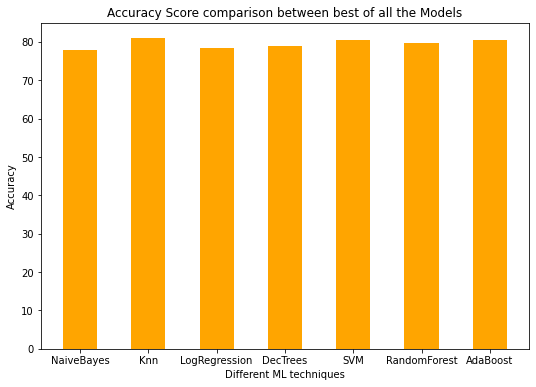

In [1816]:
bar_plot_for_comaparison(y_label='Accuracy', performance_metric = accuracies3, x_label="Different ML techniques",  bar_width=0.5, \
                             figsize=(8.75,6), color='orange', title = "Accuracy Score comparison between best of all the Models",\
                     models = ['NaiveBayes', 'Knn', 'LogRegression', 'DecTrees', 'SVM', 'RandomForest', 'AdaBoost'])

In [1801]:
sorted(accuracies3)

[77.92207792207793,
 78.35497835497836,
 78.78787878787878,
 79.65367965367966,
 79.65367965367966,
 80.51948051948052,
 80.95238095238095]

### Auroc Bar Plot :-

In [1818]:
aurocScores3 = naiveBayesAuroc3, knnAuroc3, logisticRegressionAuroc3, DecisionTreeAuroc3, SvmAuroc3, RandomForestAuroc3, \
              AdaBoostAuroc3

aurocScores3

(75.89846897663175,
 78.04995970991135,
 74.0290088638195,
 77.32070910556004,
 75.98710717163578,
 76.03948428686543,
 77.46172441579371)

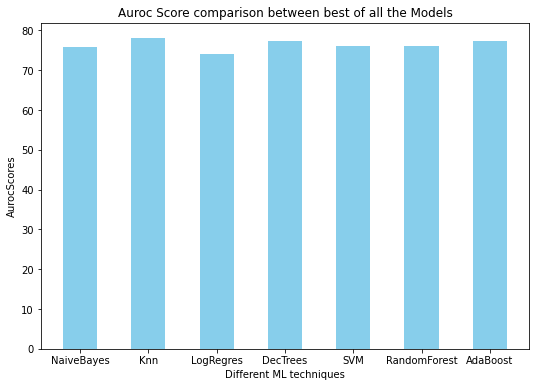

In [1819]:
bar_plot_for_comaparison(y_label='AurocScores', performance_metric = aurocScores3, x_label="Different ML techniques",  bar_width=0.5, \
                             figsize=(8.75,6), color='skyblue', title = "Auroc Score comparison between best of all the Models",\
                     models = ['NaiveBayes', 'Knn', 'LogRegres', 'DecTrees', 'SVM', 'RandomForest', 'AdaBoost'])

In [1820]:
sorted(aurocScores3)

[74.0290088638195,
 75.89846897663175,
 75.98710717163578,
 76.03948428686543,
 77.32070910556004,
 77.46172441579371,
 78.04995970991135]

### SMOTE for oversampling the diabetic datapoints :-

SMOTE(Synthetic Minority Oversampling Technique) is generally used for oversampling the samples of class which are low in number, in a highly imbalanced dataset.
In the current dataset of PIMAIndians Diabetes dataset, there isn't a very high imbalance. 
But, we want to try out SMOTE to see if the accuracy_scores and roc_auc_scores would be going up for testing the test datapoints.

Currently there are 34.895833333% of diabetic records in the dataset and the rest 65.104166666% are non-diabetic.

In numbers there are 268 diabetic records and 500 non-diabetic records.

- If the SMOTE technique is used, then the number of diabetic records gets oversampled and becomes equal to the number of non_diabetic ones.
- This would help in training phase as the model would be better trained for the diabetic_datapoints as well and might classify it well while testing the testing_datapoints.
- Let's experiment with the technique to see how it gives the results. Given the fact that, of course there isn't an extreme imbalance in the dataset. 

In [778]:
smt = SMOTE()

Let's check the number of minority and majority class samples before synthetic oversampling :-

In [779]:
counter_ = Counter(y_train)
counter_

Counter({1: 183, 0: 354})

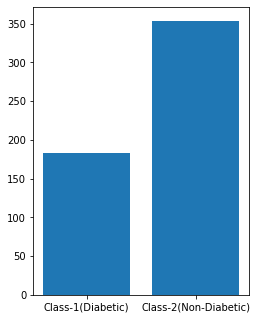

In [780]:
fig_2 = plt.figure()
ax_2 = fig_2.add_axes([1,1,0.5,1])
classes = ['Class-1(Diabetic)', 'Class-2(Non-Diabetic)']
samples = [len(y_train[y_train==1]), len(y_train[y_train==0])]
ax_2.bar(classes,samples)
plt.show()

In [781]:
X_res, y_res = smt.fit_resample(X_train_knnimp, y_train)

Before, oversampling the minority class had 183 samples and the majority had 354. Now, they both should be equal in y_res :

In [782]:
counter = Counter(y_res)
counter

Counter({1: 354, 0: 354})

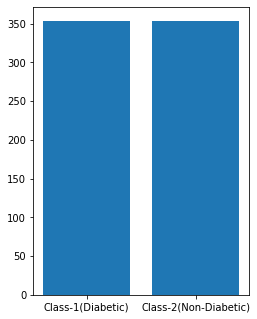

In [783]:
fig_1 = plt.figure()
ax_1 = fig_1.add_axes([1,1,0.5,1])
classes = ['Class-1(Diabetic)', 'Class-2(Non-Diabetic)']
samples = [len(y_res[y_res==1]), len(y_res[y_res==0])]
ax_1.bar(classes,samples)
plt.show()

We have oversampled the diabetic and non-diabetic datapoints. Now, is the time to perform feature scaling. Let's use MinMaxScaler() for the same :-

In [784]:
norm_1 = MinMaxScaler()

In [785]:
norm_1.fit(X_res)

MinMaxScaler()

In [786]:
X_res_scaled = norm_1.transform(X_res)

In [787]:
X_test_scaled_res = norm_1.transform(X_test_knnimp)

In [789]:
X_res_scaled

array([[1.        , 0.5974026 , 0.46938776, ..., 0.38650307, 0.03030303,
        0.43137255],
       [0.        , 0.34415584, 0.40816327, ..., 0.3803681 , 0.22950089,
        0.07843137],
       [0.06666667, 0.46753247, 0.46938776, ..., 0.18813906, 0.0530303 ,
        0.        ],
       ...,
       [0.46666667, 0.70421693, 0.58434568, ..., 0.26082538, 0.18645082,
        0.63905422],
       [0.46666667, 0.37557962, 0.43804684, ..., 0.35540073, 0.13955783,
        0.20366495],
       [0.13333333, 0.62987013, 0.48660113, ..., 0.2933356 , 0.25041236,
        0.12569295]])

In [790]:
X_test_scaled_res

array([[0.46666667, 0.5974026 , 0.51020408, ..., 0.1595092 , 0.25044563,
        0.58823529],
       [0.06666667, 0.69480519, 0.36734694, ..., 0.16155419, 0.04188948,
        0.01960784],
       [0.4       , 0.42207792, 0.36734694, ..., 0.1390593 , 0.05392157,
        0.11764706],
       ...,
       [0.06666667, 0.30519481, 0.30612245, ..., 0.14314928, 0.06639929,
        0.03921569],
       [0.66666667, 0.80519481, 0.51020408, ..., 0.40490798, 0.20142602,
        0.25490196],
       [0.6       , 0.44155844, 0.59183673, ..., 0.32719836, 0.07798574,
        0.29411765]])

Converting the Numpy Arrays into Pandas' Dataframe Objects :-

In [793]:
X_res_scaled = pd.DataFrame(X_res_scaled)
X_test_scaled_res = pd.DataFrame(X_test_scaled_res)

In [794]:
X_res_scaled

,0,1,2,3,4,5,6,7
0,1.000000,0.597403,0.469388,0.271739,0.130316,0.386503,0.030303,0.431373
1,0.000000,0.344156,0.408163,0.315217,0.116598,0.380368,0.229501,0.078431
2,0.066667,0.467532,0.469388,0.228261,0.115775,0.188139,0.053030,0.000000
3,0.133333,0.402597,0.408163,0.304348,0.142661,0.251534,0.586007,0.254902
4,0.000000,0.512987,0.653061,0.326087,0.230178,0.347648,0.049911,0.156863
...,...,...,...,...,...,...,...,...
703,0.133333,0.963583,0.469388,0.940090,0.530650,0.325043,0.208777,0.745456
704,0.466667,0.830435,0.501435,0.284739,0.653628,0.244787,0.185474,0.686817
705,0.466667,0.704217,0.584346,0.240905,0.149799,0.260825,0.186451,0.639054
706,0.466667,0.375580,0.438047,0.233889,0.115262,0.355401,0.139558,0.203665


In [795]:
X_test_scaled_res

,0,1,2,3,4,5,6,7
0,0.466667,0.597403,0.510204,0.206522,0.164609,0.159509,0.250446,0.588235
1,0.066667,0.694805,0.367347,0.206522,0.318793,0.161554,0.041889,0.019608
2,0.400000,0.422078,0.367347,0.217391,0.104527,0.139059,0.053922,0.117647
3,0.200000,0.110390,0.591837,0.228261,0.052126,0.331288,0.070410,0.490196
4,0.066667,0.467532,0.551020,0.239130,0.226337,0.366053,0.183155,0.078431
...,...,...,...,...,...,...,...,...
226,0.266667,0.305195,0.469388,0.271739,0.100137,0.304703,0.160873,0.019608
227,0.066667,0.422078,0.142857,0.119565,0.144033,0.100204,0.143494,0.098039
228,0.066667,0.305195,0.306122,0.195652,0.116598,0.143149,0.066399,0.039216
229,0.666667,0.805195,0.510204,0.226087,0.298217,0.404908,0.201426,0.254902


Now, is the time to rename the columns of X_res & X_test_scaled_res :-

In [796]:
X_res_scaled.columns = X_test_scaled_res.columns = \
[ 'preg','glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf', 'age']

In [797]:
X_res_scaled

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
0,1.000000,0.597403,0.469388,0.271739,0.130316,0.386503,0.030303,0.431373
1,0.000000,0.344156,0.408163,0.315217,0.116598,0.380368,0.229501,0.078431
2,0.066667,0.467532,0.469388,0.228261,0.115775,0.188139,0.053030,0.000000
3,0.133333,0.402597,0.408163,0.304348,0.142661,0.251534,0.586007,0.254902
4,0.000000,0.512987,0.653061,0.326087,0.230178,0.347648,0.049911,0.156863
...,...,...,...,...,...,...,...,...
703,0.133333,0.963583,0.469388,0.940090,0.530650,0.325043,0.208777,0.745456
704,0.466667,0.830435,0.501435,0.284739,0.653628,0.244787,0.185474,0.686817
705,0.466667,0.704217,0.584346,0.240905,0.149799,0.260825,0.186451,0.639054
706,0.466667,0.375580,0.438047,0.233889,0.115262,0.355401,0.139558,0.203665


In [798]:
X_test_scaled_res

,preg,glu,bp,skinThickness,insulin,bmi,dpf,age
0,0.466667,0.597403,0.510204,0.206522,0.164609,0.159509,0.250446,0.588235
1,0.066667,0.694805,0.367347,0.206522,0.318793,0.161554,0.041889,0.019608
2,0.400000,0.422078,0.367347,0.217391,0.104527,0.139059,0.053922,0.117647
3,0.200000,0.110390,0.591837,0.228261,0.052126,0.331288,0.070410,0.490196
4,0.066667,0.467532,0.551020,0.239130,0.226337,0.366053,0.183155,0.078431
...,...,...,...,...,...,...,...,...
226,0.266667,0.305195,0.469388,0.271739,0.100137,0.304703,0.160873,0.019608
227,0.066667,0.422078,0.142857,0.119565,0.144033,0.100204,0.143494,0.098039
228,0.066667,0.305195,0.306122,0.195652,0.116598,0.143149,0.066399,0.039216
229,0.666667,0.805195,0.510204,0.226087,0.298217,0.404908,0.201426,0.254902


### Naive Bayes Classifier :-

In [1517]:
gnb_classifier = GaussianNB()

gnb_classifier.fit(X_res_scaled, y_res) # Have used X_train_imputed

y_pred = gnb_classifier.predict(X_test_scaled_res)

accuracy_nb_normal_4 = accuracy_score(y_test, y_pred)*100
auroc_nb_normal_4 = roc_auc_score(y_test, y_pred)*100

accuracy_nb_normal_4

77.05627705627705

Below values will be used for plotting a bar-plot for comparison :-

In [1518]:
naiveBayesAcc4 = accuracy_nb_normal_4

naiveBayesAuroc4 = auroc_nb_normal_4

### KNN Technique :-

In [1527]:
neigh = KNeighborsClassifier(n_neighbors=17)

neigh.fit(X_res_scaled.values, y_res.values)

y_pred = neigh.predict(X_test_scaled_res.values)

accuracy_knn_normal_4 = accuracy_score(y_test, y_pred)*100

auroc_knn_normal_4 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_knn_normal_4}% is the accuracy score in percentage form with knn.")

79.65367965367966% is the accuracy score in percentage form with knn.


 #### GridSearchCV (KNN) :-

In [1528]:
params_grid_dict = {
    'n_neighbors' : np.array([i for i in range(5,25,2)]),
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

neigh = KNeighborsClassifier()

accuracy_knn_grid_4, auroc_knn_grid_4 = grid_search_cv(neigh,params_grid_dict,X_train=X_res_scaled, 
                   y_train=y_res, X_test=X_test_scaled_res, y_test=y_test)

KNeighborsClassifier(n_neighbors=9, weights='distance') is the Best Estimator according to Exhaustive Hyperparameter search.

78.35497835497836% is the accuracy score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
79.92747784045126% is the auroc score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
65.76576576576578% is the precision score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
85.88235294117646% is the recall score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
74.48979591836735% is the f1_score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (KNN)

In [1574]:
neigh = KNeighborsClassifier()

params_grid_dict = {
    # Increasing the range of n_neighbors to maybe find a better set of hyperparameters.
    'n_neighbors' : np.array([i for i in range(5,50,2)]), 
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

accuracy_knn_random_4, auroc_knn_random_4 = randomized_search_cv(neigh,params_grid_dict,X_train=X_res_scaled, 
                   y_train=y_res, X_test=X_test_scaled_res, y_test=y_test, n_iter=50)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance') is the Best Estimator according to Randomized Hyperparameter search.

81.38528138528139% is the accuracy score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
82.57050765511684% is the auroc score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
69.81132075471697% is the precision score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
87.05882352941177% is the recall score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
77.48691099476439% is the f1_score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below are the values for Accuracy and Auroc score for KNN, to be used for Bar plot for comparison :-

In [1575]:
knnAccuracy4 = max(accuracy_knn_normal_4, accuracy_knn_grid_4, accuracy_knn_random_4)

knnAuroc4 = max(auroc_knn_normal_4, auroc_knn_grid_4, auroc_knn_random_4)

### Logistic Regression :-

In [1578]:
logistic_regression = LogisticRegression(max_iter=200)

logistic_regression.fit(X_res_scaled, y_res)

# Predicting the X_test_scaled_res datapoints :
y_pred = logistic_regression.predict(X_test_scaled_res)

accuracy_lr_normal_4 = accuracy_score(y_test, y_pred)*100

auroc_lr_normal_4 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_lr_normal_4}% is the accuracy score in percentage form with LogisticRegression.")


80.51948051948052% is the accuracy score in percentage form with LogisticRegression.


#### GridSearchCV (LogisticRegression) :-

In [1579]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [100, 1000,2500, 5000],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

accuracy_lr_grid_4, auroc_lr_grid_4 = grid_search_cv(logistic_regression, params_grid_dict, 
               X_train=X_res_scaled,
               y_train = y_res,
               X_test = X_test_scaled_res,
               y_test = y_test) 

LogisticRegression(C=11.288378916846883, max_iter=5000, solver='sag') is the Best Estimator according to Exhaustive Hyperparameter search.

79.22077922077922% is the accuracy score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
79.38356164383562% is the auroc score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
68.68686868686868% is the precision score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
80.0% is the recall score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
73.91304347826086% is the f1_score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (LogisticRegression) :-

In [1611]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [50,70,80,100,1000,2500,5000, ],
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

accuracy_lr_random_4, auroc_lr_random_4 = randomized_search_cv(logistic_regression,params_grid_dict,X_train=X_res_scaled, 
                   y_train=y_res, X_test=X_test_scaled_res, y_test=y_test, n_iter=50)

LogisticRegression(C=3.359818286283774, max_iter=1000, solver='liblinear') is the Best Estimator according to Randomized Hyperparameter search.

79.65367965367966% is the accuracy score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
79.97179693795327% is the auroc score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
69.0% is the precision score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
81.17647058823529% is the recall score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
74.59459459459458% is the f1_score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1612]:
logisticRegressionAcc4 = max(accuracy_lr_normal_4, accuracy_lr_grid_4, accuracy_lr_random_4)

logisticRegressionAuroc4 = max(auroc_lr_normal_4, auroc_lr_grid_4, auroc_lr_random_4)

### Decision Tree Classifier :-

In [1613]:
# Note :- Using the imputed and not scaled data for DecisionTrees:

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_res, y_res)

y_pred = decision_tree.predict(X_test_knnimp)

accuracy_dt_normal_4 = accuracy_score(y_test, y_pred)*100

auroc_dt_normal_4 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_dt_normal_4}% is the accuracy score in percentage form with DecisionTreesTechnique.")

74.89177489177489% is the accuracy score in percentage form with DecisionTreesTechnique.


#### GridSearchCV (DecisionTrees) :-

In [1614]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,20)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_dt_grid_4, auroc_dt_grid_4  = grid_search_cv(decision_tree, params_grid_dict, 
               X_train=X_res,
               y_train = y_res,
               X_test = X_test_knnimp,
               y_test = y_test)  

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01,
                       min_samples_split=10) is the Best Estimator according to Exhaustive Hyperparameter search.

77.92207792207793% is the accuracy score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
75.65269943593876% is the auroc score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
71.25% is the precision score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
67.05882352941175% is the recall score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
69.0909090909091% is the f1_score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (DecisionTrees) :-

In [1638]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,30)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 1.10, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_dt_random_4, auroc_dt_random_4 = randomized_search_cv(decision_tree,params_grid_dict,X_train=X_res, 
                   y_train=y_res, X_test=X_test_knnimp, y_test=y_test, n_iter=50)

DecisionTreeClassifier(criterion='entropy', max_depth=24,
                       min_impurity_decrease=0.02, min_samples_split=30) is the Best Estimator according to Randomized Hyperparameter search.

77.92207792207793% is the accuracy score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
75.65269943593876% is the auroc score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
71.25% is the precision score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
67.05882352941175% is the recall score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
69.0909090909091% is the f1_score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1639]:
decisionTreeAcc4 = max(accuracy_dt_normal_4, accuracy_dt_grid_4, accuracy_dt_random_4)

decisionTreeAuroc4 = max(auroc_dt_normal_4, auroc_dt_grid_4, auroc_dt_random_4)

### Support Vector Machine :-

In [1640]:
svc_model = SVC()
svc_model.fit(X_res_scaled, y_res)

# Predicting the X_test :
y_pred = svc_model.predict(X_test_scaled_res)

accuracy_svm_normal_4 = accuracy_score(y_test, y_pred)*100

auroc_svm_normal_4 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_svm_normal_4}% is the accuracy score in percentage form with SVM technique.")

80.08658008658008% is the accuracy score in percentage form with SVM technique.


#### GridSearchCV (SVM):-

In [1641]:
svc_model = SVC()

param_grid_dict = {
    'C':[0.1, 1, 10, 100],
   'kernel' : ['rbf', 'poly','sigmoid']
}

accuracy_svm_grid_4, auroc_svm_grid_4 = grid_search_cv(svc_model, param_grid_dict, 
               X_train=X_res_scaled,
               y_train = y_res,
               X_test = X_test_scaled_res,
               y_test = y_test)

SVC(C=1) is the Best Estimator according to Exhaustive Hyperparameter search.

80.08658008658008% is the accuracy score for the SVC() using the best hyparameters suggested by GridSearchCV.
80.31426269137792% is the auroc score for the SVC() using the best hyparameters suggested by GridSearchCV.
69.6969696969697% is the precision score for the SVC() using the best hyparameters suggested by GridSearchCV.
81.17647058823529% is the recall score for the SVC() using the best hyparameters suggested by GridSearchCV.
75.0% is the f1_score for the SVC() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (SVM) :-

In [1642]:
svc_model = SVC()

param_grid_dict = {
    'C':[0.1, 1, 10, 100, 1000],
    'kernel' : ['rbf', 'poly','sigmoid', 'linear'],
    }

accuracy_svm_random_4, auroc_svm_random_4  = randomized_search_cv(svc_model,param_grid_dict,X_train=X_res_scaled, 
                   y_train=y_res, X_test=X_test_scaled_res, y_test=y_test)

SVC(C=1000) is the Best Estimator according to Randomized Hyperparameter search.

76.62337662337663% is the accuracy score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
75.11684125705077% is the auroc score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
67.81609195402298% is the precision score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
69.41176470588235% is the recall score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
68.60465116279069% is the f1_score for SVC() using the best hyparameters suggested by RandomizedSearchCV.


In [1643]:
svmAcc4 = max(accuracy_svm_normal_4, accuracy_svm_grid_4, accuracy_svm_random_4)

svmAuroc4 = max(auroc_svm_normal_4, auroc_svm_grid_4, auroc_svm_random_4)

### RandomForestClassifier :-

In [1644]:
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_res, y_res)

y_pred = random_forest.predict(X_test_knnimp)

accuracy_rf_normal_4 = accuracy_score(y_test, y_pred)*100

auroc_rf_normal_4 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_rf_normal_4}% is the accuracy score in percentage form with RandomForestClassifier technique.")

80.95238095238095% is the accuracy score in percentage form with RandomForestClassifier technique.


#### GridSearchCV (RandomForestClassifier) :-

In [1645]:
random_forest = RandomForestClassifier()

param_grid_dict = {
    'max_depth':[2,3,4,5,6,7],
    'n_estimators':[10, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100],
}

accuracy_rf_grid_4, auroc_rf_grid_4 = grid_search_cv(random_forest, param_grid_dict, 
               X_train=X_res,
               y_train = y_res,
               X_test = X_test_knnimp,
               y_test = y_test)


RandomForestClassifier(max_depth=7, n_estimators=50) is the Best Estimator according to Exhaustive Hyperparameter search.

80.08658008658008% is the accuracy score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
80.31426269137792% is the auroc score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
69.6969696969697% is the precision score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
81.17647058823529% is the recall score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
75.0% is the f1_score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (RandomForestClassifier) :-

In [1647]:
random_forest = RandomForestClassifier()

params_grid_dict = {
    'max_depth':np.arange(1,40),
    'n_estimators':np.arange(30,151,20),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_rf_random_4, auroc_rf_random_4 = randomized_search_cv(random_forest, params_grid_dict, X_train=X_res,
                    y_train=y_res, X_test=X_test_knnimp, y_test=y_test)

RandomForestClassifier(max_depth=12, min_impurity_decrease=0.01,
                       min_samples_split=20, n_estimators=110) is the Best Estimator according to Randomized Hyperparameter search.

80.08658008658008% is the accuracy score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
80.31426269137792% is the auroc score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
69.6969696969697% is the precision score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
81.17647058823529% is the recall score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
75.0% is the f1_score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1648]:
randomForestAcc4 = max(accuracy_rf_normal_4, accuracy_rf_grid_4, accuracy_rf_random_4)

randomForestAuroc4 = max(auroc_rf_normal_4, auroc_rf_grid_4, auroc_rf_random_4)

### Adaboost Classifier :-

In [1650]:
adaboost_classifier = AdaBoostClassifier(random_state=42)

adaboost_classifier.fit(X_res.values, y_res.values)

y_pred = adaboost_classifier.predict(X_test_knnimp.values)

accuracy_ab_normal_4 = accuracy_score(y_test, y_pred)*100

auroc_ab_normal_4 = roc_auc_score(y_test, y_pred)*100

print(f'{accuracy_ab_normal_4}% is the accuracy score using AdaboostClassifier.')

79.65367965367966% is the accuracy score using AdaboostClassifier.


#### GridSearchCV (Adaboost Classifier) :-

In [1651]:
adaboost_classifier = AdaBoostClassifier()

param_grid_dict = {
    'n_estimators':np.arange(50,100,10),
    'learning_rate':np.arange(1.0,10.0,1.0)
}

accuracy_ab_grid_4, auroc_ab_grid_4 = grid_search_cv(adaboost_classifier, param_grid_dict, 
               X_train=X_res,
               y_train = y_res,
               X_test = X_test_knnimp,
               y_test = y_test)

AdaBoostClassifier(n_estimators=80) is the Best Estimator according to Exhaustive Hyperparameter search.

78.78787878787878% is the accuracy score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
79.04109589041096% is the auroc score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
68.0% is the precision score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
80.0% is the recall score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.
73.51351351351352% is the f1_score for the AdaBoostClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (Adaboost Classifier) :-

In [1656]:
adaboost_classifier = AdaBoostClassifier()

param_grid_dict = {
    'n_estimators':np.arange(50,130,10),
    'learning_rate':np.arange(1,20,1)
}

accuracy_ab_random_4, auroc_ab_random_4 = randomized_search_cv(adaboost_classifier, param_grid_dict, X_res,
                    y_train=y_res, X_test=X_test_knnimp, y_test=y_test)

AdaBoostClassifier(learning_rate=1) is the Best Estimator according to Randomized Hyperparameter search.

80.08658008658008% is the accuracy score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
80.06849315068493% is the auroc score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
70.10309278350515% is the precision score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
80.0% is the recall score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.
74.72527472527473% is the f1_score for AdaBoostClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1657]:
adaBoostAcc4 = max(accuracy_ab_normal_4, accuracy_ab_grid_4, accuracy_ab_random_4)

adaBoostAuroc4 = max(auroc_ab_normal_4, auroc_ab_grid_4, auroc_ab_random_4)

### Accuracy Bar Plot :-

In [1659]:
accuracies4 = naiveBayesAcc4, knnAccuracy4, logisticRegressionAcc4, decisionTreeAcc4, svmAcc4, randomForestAcc4, \
              adaBoostAcc4

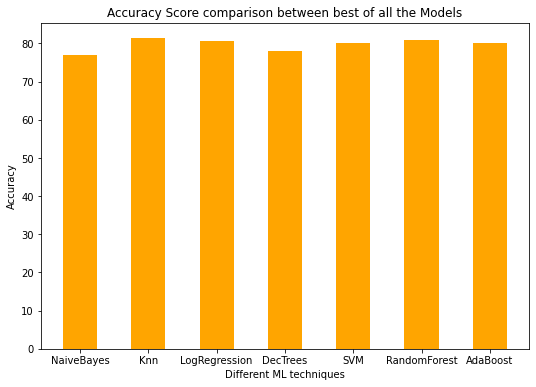

In [1660]:
bar_plot_for_comaparison(y_label='Accuracy', performance_metric = accuracies4, x_label="Different ML techniques",  bar_width=0.5, \
                             figsize=(8.75,6), color='orange', title = "Accuracy Score comparison between best of all the Models",\
                     models = ['NaiveBayes', 'Knn', 'LogRegression', 'DecTrees', 'SVM', 'RandomForest', 'AdaBoost'])

In [1661]:
sorted(accuracies4)

[77.05627705627705,
 77.92207792207793,
 80.08658008658008,
 80.08658008658008,
 80.51948051948052,
 80.95238095238095,
 81.38528138528139]

### Auroc Bar Plot :-

In [1663]:
aurocScores4 = naiveBayesAuroc4, knnAuroc4, logisticRegressionAuroc4, decisionTreeAuroc4, svmAuroc4, randomForestAuroc4, \
              adaBoostAuroc4

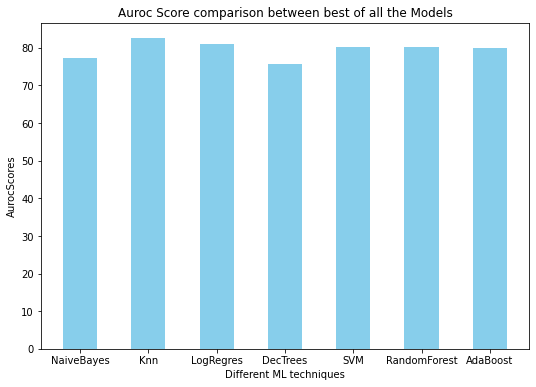

In [1666]:
bar_plot_for_comaparison(y_label='AurocScores', performance_metric = aurocScores4, x_label="Different ML techniques",  bar_width=0.5, \
                             figsize=(8.75,6), color='skyblue', title = "Auroc Score comparison between best of all the Models",\
                     models = ['NaiveBayes', 'Knn', 'LogRegres', 'DecTrees', 'SVM', 'RandomForest', 'AdaBoost'])

In [1665]:
sorted(aurocScores4)

[75.65269943593876,
 77.42546333601933,
 80.06849315068493,
 80.31426269137792,
 80.31426269137792,
 80.90249798549557,
 82.57050765511684]

### SMOTE(oversampling) the Mean Imputed Data and Analysing :-

   Step 1 :- First thing that I have to do is Oversampling the Mean Imputed training data. 
   Step 2 :- Feature Scale Mean Imputed oversamplied training data and X_test_imputed.
   
   Note :- To remember that, For decision trees and etc. have to use X_train_oversampled_imputed and X_test_imputed.
   For the rest use, X_train_scaled_oversampled_imputed and X_test_scaled_imputed.

In [1851]:
smt_1 = SMOTE()

In [1853]:
X_res_imputed, y_res_imputed = smt.fit_resample(X_train_imputed, y_train)

Now, we have X_res_imputed, y_res_imputed, X_test_imputed, y_test..which will be used for algorithms such as Decision Trees, Random Forest, Adaboost Classifier etc.

For, Logistic Regression, KNN, Support Vector Machine, it is more suitable to scale the X_res_imputed & X_test_imputed

In [1856]:
norm_2 = MinMaxScaler()

In [1857]:
norm_2.fit(X_res_imputed)

MinMaxScaler()

In [1858]:
X_res_scaled_trmeanimp = norm_2.transform(X_res_imputed)

X_res_scaled_temeanimp = norm_2.transform(X_test_imputed)

In [1860]:
X_res_scaled_trmeanimp = pd.DataFrame(X_res_scaled_trmeanimp)

X_res_scaled_temeanimp = pd.DataFrame(X_res_scaled_temeanimp)

In [1863]:
X_res_scaled_trmeanimp

,0,1,2,3,4,5,6,7
0,1.000000,0.597403,0.469388,0.271739,0.130316,0.386503,0.030303,0.431373
1,0.000000,0.344156,0.408163,0.315217,0.116598,0.380368,0.229501,0.078431
2,0.066667,0.467532,0.469388,0.228261,0.196493,0.188139,0.053030,0.000000
3,0.133333,0.402597,0.408163,0.304348,0.142661,0.251534,0.586007,0.254902
4,0.000000,0.512987,0.653061,0.326087,0.196493,0.347648,0.049911,0.156863
...,...,...,...,...,...,...,...,...
703,0.200000,0.898132,0.496721,0.224916,0.246883,0.354385,0.227798,0.261290
704,0.666667,0.733665,0.773292,0.231857,0.194234,0.409773,0.287538,0.431068
705,0.466667,0.409336,0.420290,0.211132,0.196493,0.212175,0.246399,0.197556
706,0.400000,0.971310,0.462152,0.235567,0.196493,0.241345,0.126407,0.198396


In [1864]:
X_res_scaled_temeanimp

,0,1,2,3,4,5,6,7
0,0.466667,0.597403,0.510204,0.206522,0.164609,0.159509,0.250446,0.588235
1,0.066667,0.694805,0.367347,0.235567,0.196493,0.161554,0.041889,0.019608
2,0.400000,0.422078,0.367347,0.217391,0.196493,0.139059,0.053922,0.117647
3,0.200000,0.110390,0.591837,0.228261,0.196493,0.331288,0.070410,0.490196
4,0.066667,0.467532,0.551020,0.239130,0.226337,0.366053,0.183155,0.078431
...,...,...,...,...,...,...,...,...
226,0.266667,0.305195,0.469388,0.271739,0.100137,0.304703,0.160873,0.019608
227,0.066667,0.422078,0.142857,0.119565,0.144033,0.100204,0.143494,0.098039
228,0.066667,0.305195,0.306122,0.195652,0.116598,0.143149,0.066399,0.039216
229,0.666667,0.805195,0.510204,0.235567,0.196493,0.404908,0.201426,0.254902


Time to rename the columns :-

In [1865]:
X_res_scaled_trmeanimp.columns = X_res_scaled_temeanimp.columns =\
[ 'preg','glu', 'bp', 'skinThickness', 'insulin', 'bmi', 'dpf', 'age']

Now, we have the data preprocessed for applying various data mining techniques for prediction. So, let's apply different algorithms :

#### Naive Bayes Classifier :-

In [1875]:
gnb_classifier = GaussianNB()

gnb_classifier.fit(X_res_scaled_trmeanimp, y_res_imputed) 

y_pred = gnb_classifier.predict(X_res_scaled_temeanimp)

accuracy_nb_normal_5 = accuracy_score(y_test, y_pred)*100
auroc_nb_normal_5 = roc_auc_score(y_test, y_pred)*100

accuracy_nb_normal_5, auroc_nb_normal_5

(77.05627705627705, 77.17969379532634)

Below values will be used for plotting a bar-plot for comparison :-

In [1879]:
naiveBayesAcc5 = accuracy_nb_normal_5

naiveBayesAuroc5 = auroc_nb_normal_5

#### KNN Technique :-

In [1884]:
neigh = KNeighborsClassifier()

neigh.fit(X_res_scaled_trmeanimp.values, y_res_imputed.values)

y_pred = neigh.predict(X_res_scaled_temeanimp.values)

accuracy_knn_normal_5 = accuracy_score(y_test, y_pred)*100

auroc_knn_normal_5 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_knn_normal_5}% is the accuracy score in percentage form with knn.")

77.92207792207793% is the accuracy score in percentage form with knn.


In [1885]:
auroc_knn_normal_5

78.60193392425462

#### GridSearchCV (KNN) :-


In [1890]:
params_grid_dict = {
    'n_neighbors' : np.array([i for i in range(5,35,2)]),
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

neigh = KNeighborsClassifier()

accuracy_knn_grid_5, auroc_knn_grid_5 = grid_search_cv(neigh,params_grid_dict,X_train=X_res_scaled_trmeanimp, 
                   y_train=y_res_imputed, X_test=X_res_scaled_temeanimp, y_test=y_test)

KNeighborsClassifier(n_neighbors=15, weights='distance') is the Best Estimator according to Exhaustive Hyperparameter search.

80.08658008658008% is the accuracy score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
81.29734085414988% is the auroc score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
68.22429906542055% is the precision score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
85.88235294117646% is the recall score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.
76.04166666666666% is the f1_score for the KNeighborsClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (KNN)

In [1905]:
neigh = KNeighborsClassifier()

params_grid_dict = {
    # Increasing the range of n_neighbors to maybe find a better set of hyperparameters.
    'n_neighbors' : np.array([i for i in range(5,50,2)]), 
    'weights': ['distance', 'uniform'],
    'metric':['minkowski', 'euclidean']
}

accuracy_knn_random_5, auroc_knn_random_5 = randomized_search_cv(neigh,params_grid_dict,X_train=X_res_scaled_trmeanimp, 
                   y_train=y_res_imputed, X_test=X_res_scaled_temeanimp, y_test=y_test, n_iter=50)

KNeighborsClassifier(metric='euclidean', n_neighbors=15, weights='distance') is the Best Estimator according to Randomized Hyperparameter search.

80.08658008658008% is the accuracy score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
81.29734085414988% is the auroc score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
68.22429906542055% is the precision score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
85.88235294117646% is the recall score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.
76.04166666666666% is the f1_score for KNeighborsClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below are the values for Accuracy and Auroc score for KNN, to be used for Bar plot for comparison :-

In [1906]:
knnAccuracy5 = max(accuracy_knn_normal_5, accuracy_knn_grid_5, accuracy_knn_random_5)

knnAuroc5 = max(auroc_knn_normal_5, auroc_knn_grid_5, auroc_knn_random_5)

### Logistic Regression :-


In [1908]:
logistic_regression = LogisticRegression(max_iter=200)

logistic_regression.fit(X_res_scaled_trmeanimp, y_res_imputed)

# Predicting the X_test_scaled_res datapoints :
y_pred = logistic_regression.predict(X_res_scaled_temeanimp)

accuracy_lr_normal_5 = accuracy_score(y_test, y_pred)*100

auroc_lr_normal_5 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_lr_normal_5}% is the accuracy score in percentage form with LogisticRegression.")

80.08658008658008% is the accuracy score in percentage form with LogisticRegression.


#### GridSearchCV (LogisticRegression) :-

In [1909]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [100, 1000,2500, 5000],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

accuracy_lr_grid_5, auroc_lr_grid_5 = grid_search_cv(logistic_regression, params_grid_dict, 
               X_train=X_res_scaled_trmeanimp,
               y_train = y_res_imputed,
               X_test = X_res_scaled_temeanimp,
               y_test = y_test) 


LogisticRegression(C=0.615848211066026, penalty='l1', solver='saga') is the Best Estimator according to Exhaustive Hyperparameter search.

79.65367965367966% is the accuracy score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
79.48025785656728% is the auroc score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
69.79166666666666% is the precision score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
78.82352941176471% is the recall score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.
74.03314917127071% is the f1_score for the LogisticRegression() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (LogisticRegression) :-

In [1931]:
logistic_regression = LogisticRegression()

params_grid_dict = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [50,70,80,100,1000,2500,5000, ],
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    
}

accuracy_lr_random_5, auroc_lr_random_5 = randomized_search_cv(logistic_regression,params_grid_dict,X_train=X_res_scaled_trmeanimp, 
                   y_train=y_res_imputed, X_test=X_res_scaled_temeanimp, y_test=y_test, n_iter=50)

LogisticRegression(C=37.92690190732238, max_iter=1000, solver='newton-cg') is the Best Estimator according to Randomized Hyperparameter search.

79.22077922077922% is the accuracy score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
78.89202256244964% is the auroc score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
69.47368421052632% is the precision score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
77.64705882352942% is the recall score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.
73.33333333333334% is the f1_score for LogisticRegression() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1932]:
logisticRegressionAcc5 = max(accuracy_lr_normal_5, accuracy_lr_grid_5, accuracy_lr_random_5)

logisticRegressionAuroc5 = max(auroc_lr_normal_5, auroc_lr_grid_5, auroc_lr_random_5)

#### Decision Tree Classifier :-

In [1934]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_res_imputed, y_res_imputed)

y_pred = decision_tree.predict(X_test_imputed)

accuracy_dt_normal_5 = accuracy_score(y_test, y_pred)*100

auroc_dt_normal_5 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_dt_normal_5}% is the accuracy score in percentage form with DecisionTreesTechnique.")

68.83116883116884% is the accuracy score in percentage form with DecisionTreesTechnique.


#### GridSearchCV (DecisionTrees) :-

In [1935]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,20)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_dt_grid_5, auroc_dt_grid_5  = grid_search_cv(decision_tree, params_grid_dict, 
               X_train=X_res_imputed,
               y_train = y_res_imputed,
               X_test = X_test_imputed,
               y_test = y_test)  

DecisionTreeClassifier(criterion='entropy', max_depth=8,
                       min_impurity_decrease=0.01, min_samples_split=80) is the Best Estimator according to Exhaustive Hyperparameter search.

76.62337662337663% is the accuracy score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
78.06607574536665% is the auroc score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
63.96396396396396% is the precision score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
83.52941176470588% is the recall score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.
72.44897959183673% is the f1_score for the DecisionTreeClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (DecisionTrees) :-

In [1950]:
decision_tree = DecisionTreeClassifier()

params_grid_dict = {
    'max_depth' : np.array([i for i in range(2,30)]),
    'criterion' : np.array(['gini', 'entropy']),
    'min_impurity_decrease': np.arange(0.01, 1.10, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_dt_random_5, auroc_dt_random_5 = randomized_search_cv(decision_tree,params_grid_dict,X_train=X_res_imputed, 
                   y_train=y_res_imputed, X_test=X_test_imputed, y_test=y_test, n_iter=50)

DecisionTreeClassifier(criterion='entropy', max_depth=21,
                       min_impurity_decrease=0.01, min_samples_split=70) is the Best Estimator according to Randomized Hyperparameter search.

76.62337662337663% is the accuracy score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
78.06607574536665% is the auroc score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
63.96396396396396% is the precision score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
83.52941176470588% is the recall score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.
72.44897959183673% is the f1_score for DecisionTreeClassifier() using the best hyparameters suggested by RandomizedSearchCV.


Below values are to be used for comparison purpose in the bar plot :-

In [1951]:
decisionTreeAcc5 = max(accuracy_dt_normal_5, accuracy_dt_grid_5, accuracy_dt_random_5)

decisionTreeAuroc5 = max(auroc_dt_normal_5, auroc_dt_grid_5, auroc_dt_random_5)

### Support Vector Machine :-

In [1952]:
svc_model = SVC()
svc_model.fit(X_res_scaled_trmeanimp, y_res_imputed)

# Predicting the X_test :
y_pred = svc_model.predict(X_res_scaled_temeanimp)

accuracy_svm_normal_5 = accuracy_score(y_test, y_pred)*100

auroc_svm_normal_5 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_svm_normal_5}% is the accuracy score in percentage form with SVM technique.")

80.95238095238095% is the accuracy score in percentage form with SVM technique.


In [1953]:
auroc_svm_normal_5

80.26188557614826

#### GridSearchCV (SVM):-

In [1954]:
svc_model = SVC()

param_grid_dict = {
    'C':[0.1, 1, 10, 100],
   'kernel' : ['rbf', 'poly','sigmoid']
}

accuracy_svm_grid_5, auroc_svm_grid_5 = grid_search_cv(svc_model, param_grid_dict, 
               X_train=X_res_scaled_trmeanimp,
               y_train = y_res_imputed,
               X_test = X_res_scaled_temeanimp,
               y_test = y_test)

SVC(C=0.1, kernel='poly') is the Best Estimator according to Exhaustive Hyperparameter search.

81.81818181818183% is the accuracy score for the SVC() using the best hyparameters suggested by GridSearchCV.
79.96373892022562% is the auroc score for the SVC() using the best hyparameters suggested by GridSearchCV.
76.5432098765432% is the precision score for the SVC() using the best hyparameters suggested by GridSearchCV.
72.94117647058823% is the recall score for the SVC() using the best hyparameters suggested by GridSearchCV.
74.69879518072288% is the f1_score for the SVC() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (SVM) :-

In [1955]:
svc_model = SVC()

param_grid_dict = {
    'C':[0.1, 1, 10, 100, 1000],
    'kernel' : ['rbf', 'poly','sigmoid', 'linear'],
    }

accuracy_svm_random_5, auroc_svm_random_5  = randomized_search_cv(svc_model,param_grid_dict,X_train=X_res_scaled_trmeanimp, 
                   y_train=y_res_imputed, X_test=X_res_scaled_temeanimp, y_test=y_test)

SVC(C=0.1, kernel='poly') is the Best Estimator according to Randomized Hyperparameter search.

81.81818181818183% is the accuracy score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
79.96373892022562% is the auroc score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
76.5432098765432% is the precision score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
72.94117647058823% is the recall score for SVC() using the best hyparameters suggested by RandomizedSearchCV.
74.69879518072288% is the f1_score for SVC() using the best hyparameters suggested by RandomizedSearchCV.


In [1957]:
svmAcc5 = max(accuracy_svm_normal_5, accuracy_svm_grid_5, accuracy_svm_random_5)

svmAuroc5 = max(auroc_svm_normal_5, auroc_svm_grid_5, auroc_svm_random_5)

### RandomForestClassifier :-

In [1958]:
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_res_imputed, y_res_imputed)

y_pred = random_forest.predict(X_test_imputed)

accuracy_rf_normal_5 = accuracy_score(y_test, y_pred)*100

auroc_rf_normal_5 = roc_auc_score(y_test, y_pred)*100

print(f"{accuracy_rf_normal_5}% is the accuracy score in percentage form with RandomForestClassifier technique.")

80.95238095238095% is the accuracy score in percentage form with RandomForestClassifier technique.


In [1959]:
auroc_rf_normal_5

80.26188557614826

#### GridSearchCV (RandomForestClassifier) :-

In [1960]:
random_forest = RandomForestClassifier()

param_grid_dict = {
    'max_depth':[2,3,4,5,6,7],
    'n_estimators':[10, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100],
}

accuracy_rf_grid_5, auroc_rf_grid_5 = grid_search_cv(random_forest, param_grid_dict, 
               X_train=X_res_imputed,
               y_train = y_res_imputed,
               X_test = X_test_imputed,
               y_test = y_test)

RandomForestClassifier(max_depth=7, n_estimators=70) is the Best Estimator according to Exhaustive Hyperparameter search.

79.65367965367966% is the accuracy score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
79.48025785656728% is the auroc score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
69.79166666666666% is the precision score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
78.82352941176471% is the recall score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.
74.03314917127071% is the f1_score for the RandomForestClassifier() using the best hyparameters suggested by GridSearchCV.


#### RandomizedSearchCV (RandomForestClassifier) :-

In [1967]:
random_forest = RandomForestClassifier()

params_grid_dict = {
    'max_depth':np.arange(1,40),
    'n_estimators':np.arange(30,161,20),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_rf_random_5, auroc_rf_random_5 = randomized_search_cv(random_forest, params_grid_dict, X_train=X_res_imputed,
                    y_train=y_res_imputed, X_test=X_test_imputed, y_test=y_test, n_iter=50)

RandomForestClassifier(max_depth=15, min_impurity_decrease=0.01,
                       min_samples_split=30, n_estimators=30) is the Best Estimator according to Randomized Hyperparameter search.

82.68398268398268% is the accuracy score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
83.35213537469784% is the auroc score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
72.27722772277228% is the precision score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
85.88235294117646% is the recall score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
78.49462365591398% is the f1_score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.


In [1979]:
random_forest = RandomForestClassifier()

params_grid_dict = {
    'max_depth':np.arange(1,40),
    'n_estimators':np.arange(30,161,20),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_rf_random_6, auroc_rf_random_6 = randomized_search_cv(random_forest, params_grid_dict, X_train=X_res_imputed,
                    y_train=y_res_imputed, X_test=X_test_imputed, y_test=y_test, n_iter=50)

RandomForestClassifier(max_depth=34, min_impurity_decrease=0.01,
                       min_samples_split=30, n_estimators=150) is the Best Estimator according to Randomized Hyperparameter search.

83.11688311688312% is the accuracy score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
83.4488315874295% is the auroc score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
73.46938775510205% is the precision score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
84.70588235294117% is the recall score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
78.68852459016394% is the f1_score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.


In [1995]:
random_forest = RandomForestClassifier()

params_grid_dict = {
    'max_depth':np.arange(1,40),
    'n_estimators':np.arange(30,161,20),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_rf_random_7, auroc_rf_random_7 = randomized_search_cv(random_forest, params_grid_dict, X_train=X_res_imputed,
                    y_train=y_res_imputed, X_test=X_test_imputed, y_test=y_test, n_iter=75)

RandomForestClassifier(max_depth=21, min_impurity_decrease=0.01,
                       min_samples_split=20, n_estimators=50) is the Best Estimator according to Randomized Hyperparameter search.

83.11688311688312% is the accuracy score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
82.95729250604352% is the auroc score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
74.46808510638297% is the precision score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
82.35294117647058% is the recall score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
78.21229050279331% is the f1_score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.


In [2004]:
random_forest = RandomForestClassifier()

params_grid_dict = {
    'max_depth':np.arange(1,40),
    'n_estimators':np.arange(30,161,20),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_rf_random_8, auroc_rf_random_8 = randomized_search_cv(random_forest, params_grid_dict, X_train=X_res_imputed,
                    y_train=y_res_imputed, X_test=X_test_imputed, y_test=y_test, n_iter=85)

RandomForestClassifier(max_depth=37, min_impurity_decrease=0.01,
                       min_samples_split=40, n_estimators=50) is the Best Estimator according to Randomized Hyperparameter search.

83.11688311688312% is the accuracy score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
83.69460112812249% is the auroc score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
73.0% is the precision score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
85.88235294117646% is the recall score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
78.9189189189189% is the f1_score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.


In [2015]:
random_forest = RandomForestClassifier()

params_grid_dict = {
    'max_depth':np.arange(1,40),
    'n_estimators':np.arange(30,161,20),
    'min_impurity_decrease': np.arange(0.01, 0.06, 0.01),
    'min_samples_split': np.arange(10,100,10) 
}

accuracy_rf_random_9, auroc_rf_random_9 = randomized_search_cv(random_forest, params_grid_dict, X_train=X_res_imputed,
                    y_train=y_res_imputed, X_test=X_test_imputed, y_test=y_test, n_iter=100)

RandomForestClassifier(max_depth=13, min_impurity_decrease=0.01,
                       min_samples_split=40, n_estimators=90) is the Best Estimator according to Randomized Hyperparameter search.

83.54978354978356% is the accuracy score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
83.79129734085414% is the auroc score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
74.22680412371135% is the precision score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
84.70588235294117% is the recall score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
79.12087912087912% is the f1_score for RandomForestClassifier() using the best hyparameters suggested by RandomizedSearchCV.
